Source: https://dashee87.github.io/deep%20learning/python/predicting-cryptocurrency-prices-with-deep-learning/

In [1]:
from datetime import datetime as dt
from datetime import timedelta as tdel

import pandas as pd
import time
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
import datetime
import numpy as np

import os

In [2]:
import tensorflow as tf
from tensorflow.contrib import learn

from tensorflow.python.framework import dtypes
from tensorflow.contrib import learn as tflearn
from tensorflow.contrib import layers as tflayers
from tensorflow.contrib import rnn
from tensorflow.contrib.learn.python import SKCompat

# import the train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Get current working directory
cwd = os.getcwd()
print(cwd)

/Users/siddharthbhaduri/Desktop/Career/personal_projects/Prediction_Crypto


# First we collect all the historical data

In [4]:
# get market info for bitcoin from the 2013 to the current day
bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]

#print (bitcoin_market_info['Date'][0])
# convert the date string to the correct date format

#bitcoin_market_info['Date'] = pd.to_datetime(bitcoin_market_info['Date'])
bitcoin_market_info['Date'] = bitcoin_market_info['Date'].apply(lambda x: dt.strptime(x,'%b %d, %Y'))

#print (bitcoin_market_info['Date'][0])
# when Volume is equal to '-' convert it to 0
bitcoin_market_info.loc[bitcoin_market_info['Volume']=="-",'Volume']=0

# convert to int
bitcoin_market_info['Volume'] = bitcoin_market_info['Volume'].astype('int64')

# look at the first few rows
bitcoin_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-01-31,10108.2,10381.6,9777.42,10221.1,8041160000,170183000000
1,2018-01-30,11306.8,11307.2,10036.20,10106.3,8637860000,190339000000
2,2018-01-29,11755.5,11875.6,11179.20,11296.4,7107360000,197871000000
3,2018-01-28,11475.3,12040.3,11475.30,11786.3,8350360000,193133000000
4,2018-01-27,11174.9,11614.9,10989.20,11440.7,7583270000,188054000000


In [5]:
# get market info for bitcoin from the 2013 to the current day
ethereum_market_info = pd.read_html("https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]

# convert the date string to the correct date format

ethereum_market_info['Date'] = ethereum_market_info['Date'].apply(lambda x: dt.strptime(x,'%b %d, %Y'))

# when Volume is equal to '-' convert it to 0
#ethereum_market_info.loc[ethereum_market_info['Volume']=="-",'Volume']=0

# convert to int
ethereum_market_info['Volume'] = ethereum_market_info['Volume'].astype('int64')

# look at the first few rows
ethereum_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-01-31,1071.09,1128.66,1034.50,1118.31,3757560000,104231000000
1,2018-01-30,1184.13,1184.63,1058.97,1071.13,4107860000,115207000000
2,2018-01-29,1246.70,1256.70,1169.08,1182.36,3715080000,121269000000
3,2018-01-28,1111.78,1257.77,1111.78,1246.01,5372330000,108122000000
4,2018-01-27,1055.75,1121.98,1042.12,1107.07,3002870000,102651000000


In [6]:
# get market info for bitcoin from the 2013 to the current day
decred_market_info = pd.read_html("https://coinmarketcap.com/currencies/decred/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]

# convert the date string to the correct date format
decred_market_info['Date'] = decred_market_info['Date'].apply(lambda x: dt.strptime(x,'%b %d, %Y'))

# when Volume is equal to '-' convert it to 0
#decred_market_info.loc[decred_market_info['Volume']=="-",'Volume']=0

# convert to int
decred_market_info['Volume'] = decred_market_info['Volume'].astype('int64')

# look at the first few rows
decred_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-01-31,89.90,100.39,88.22,97.83,4526180,598813000
1,2018-01-30,98.17,102.88,88.60,89.28,7570670,653214000
2,2018-01-29,93.15,98.73,88.10,98.73,4818180,619241000
3,2018-01-28,92.44,96.19,90.87,93.24,1520330,613974000
4,2018-01-27,90.83,94.92,87.86,92.12,1407310,602601000


In [7]:
# get market info for bitcoin from the 2013 to the current day
#monero_market_info = pd.read_html("https://coinmarketcap.com/currencies/monero/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]

# convert the date string to the correct date format
#monero_market_info['Date'] = monero_market_info['Date'].apply(lambda x: 
 #                                   dt.strptime(x,'%b %d, %Y'))

# when Volume is equal to '-' convert it to 0
#monero_market_info.loc[monero_market_info['Volume']=="-",'Volume']=0

# convert to int
#monero_market_info['Volume'] = monero_market_info['Volume'].astype('int64')

# look at the first few rows
#monero_market_info.head()

In [8]:
# get market info for bitcoin from the 2013 to the current day
tron_market_info = pd.read_html("https://coinmarketcap.com/currencies/tron/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]

# convert the date string to the correct date format
tron_market_info['Date'] = tron_market_info['Date'].apply(lambda x: dt.strptime(x,'%b %d, %Y'))

# when Volume is equal to '-' convert it to 0
#tron_market_info.loc[tron_market_info['Volume']=="-",'Volume']=0

# convert to int
tron_market_info['Volume'] = tron_market_info['Volume'].astype('int64')

# look at the first few rows
tron_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-01-31,0.053958,0.054454,0.049636,0.054454,251081000,3547640000
1,2018-01-30,0.064065,0.064120,0.051582,0.053761,267126000,4212160000
2,2018-01-29,0.065431,0.066769,0.063113,0.064001,256876000,4302000000
3,2018-01-28,0.068916,0.070875,0.065049,0.065495,276321000,4531100000
4,2018-01-27,0.066495,0.069426,0.064973,0.068422,282557000,4371910000


In [9]:
bitcoin_market_info.columns =[bitcoin_market_info.columns[0]]+['bt_'+i for i in bitcoin_market_info.columns[1:]]
ethereum_market_info.columns =[ethereum_market_info.columns[0]]+['eth_'+i for i in ethereum_market_info.columns[1:]]
decred_market_info.columns =[decred_market_info.columns[0]]+['decr_'+i for i in decred_market_info.columns[1:]]
#monero_market_info.columns =[monero_market_info.columns[0]]+['moner_'+i for i in monero_market_info.columns[1:]]
tron_market_info.columns =[tron_market_info.columns[0]]+['tron_'+i for i in tron_market_info.columns[1:]]

In [10]:
# getting the Bitcoin, Ethereum, Decred and Tron logos
import sys
from PIL import Image
import io

if sys.version_info[0] < 3:
    import urllib2 as urllib
    bt_img = urllib.urlopen("http://logok.org/wp-content/uploads/2016/10/Bitcoin-Logo-640x480.png")
    eth_img = urllib.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Ethereum_logo_2014.svg/256px-Ethereum_logo_2014.svg.png")
    decr_img = urllib.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Decred_logo_full_color.png/640px-Decred_logo_full_color.png")
    #moner_img = urllib.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/2/2d/Monero-Logo.svg/640px-Monero-Logo.svg.png")
    tron_img = urllib.urlopen("http://list.wiki/images/7/79/Tron-logo.png")
else:
    import urllib
    bt_img = urllib.request.urlopen("http://logok.org/wp-content/uploads/2016/10/Bitcoin-Logo-640x480.png")
    eth_img = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Ethereum_logo_2014.svg/256px-Ethereum_logo_2014.svg.png")
    decr_img = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Decred_logo_full_color.png/640px-Decred_logo_full_color.png")
    #moner_img = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/2/2d/Monero-Logo.svg/640px-Monero-Logo.svg.png")
    tron_img = urllib.request.urlopen("http://list.wiki/images/7/79/Tron-logo.png")

image_file = io.BytesIO(bt_img.read())
bitcoin_im = Image.open(image_file)

image_file = io.BytesIO(eth_img.read())
eth_im = Image.open(image_file)

image_file = io.BytesIO(decr_img.read())
decr_im = Image.open(image_file)

#image_file = io.BytesIO(moner_img.read())
#moner_im = Image.open(image_file)

image_file = io.BytesIO(tron_img.read())
tron_im = Image.open(image_file)

width_eth_im , height_eth_im  = eth_im.size
eth_im = eth_im.resize((int(eth_im.size[0]*0.8), int(eth_im.size[1]*0.8)), Image.ANTIALIAS)

# Bitcoin Price and Volume 

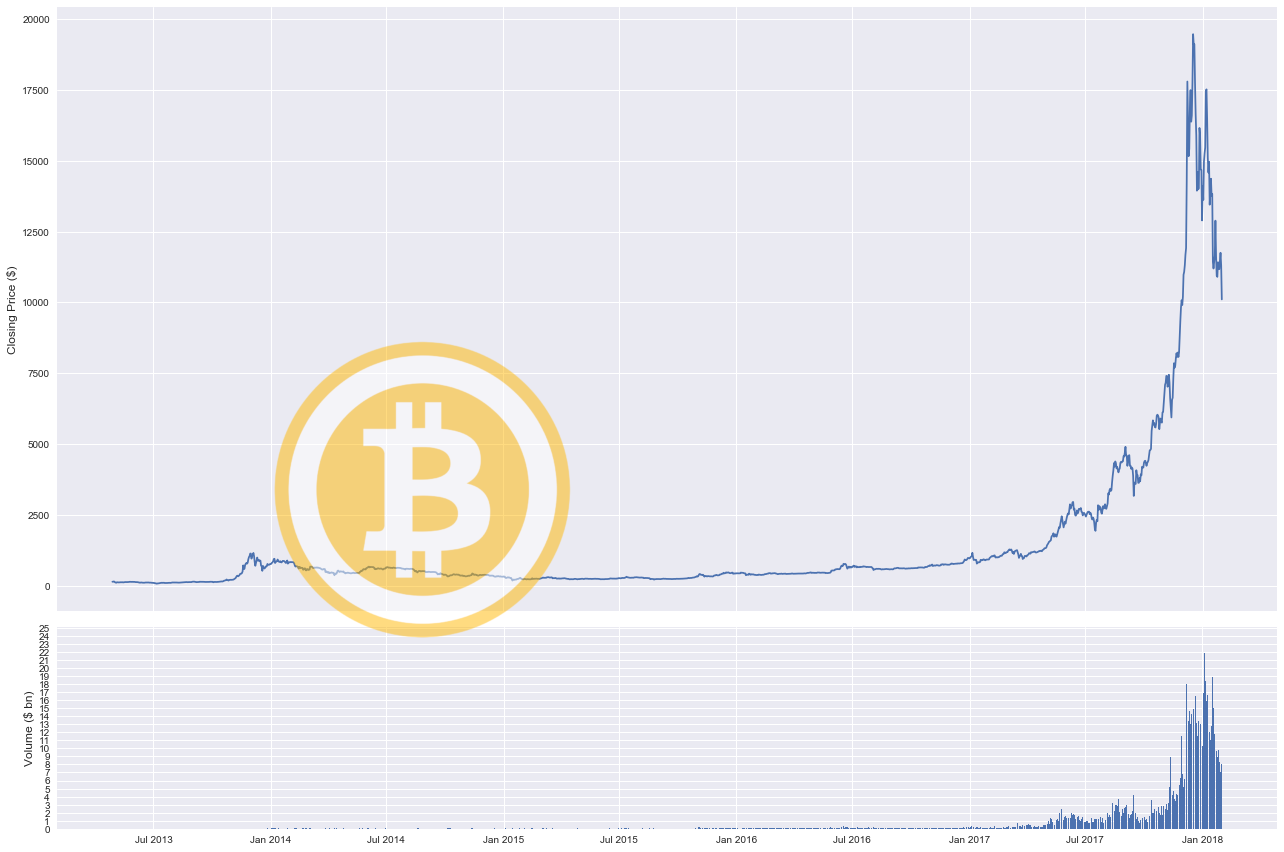

In [11]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]}, figsize = (18,12))
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(27)])
ax2.set_yticklabels(range(27))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(bitcoin_market_info['Date'].astype(datetime.datetime),bitcoin_market_info['bt_Open'])
ax2.bar(bitcoin_market_info['Date'].astype(datetime.datetime).values, bitcoin_market_info['bt_Volume'].values)
fig.tight_layout()
fig.figimage(bitcoin_im, 100, 120, zorder=3,alpha=.5)
plt.show()

# Ethereum Price and Volume 

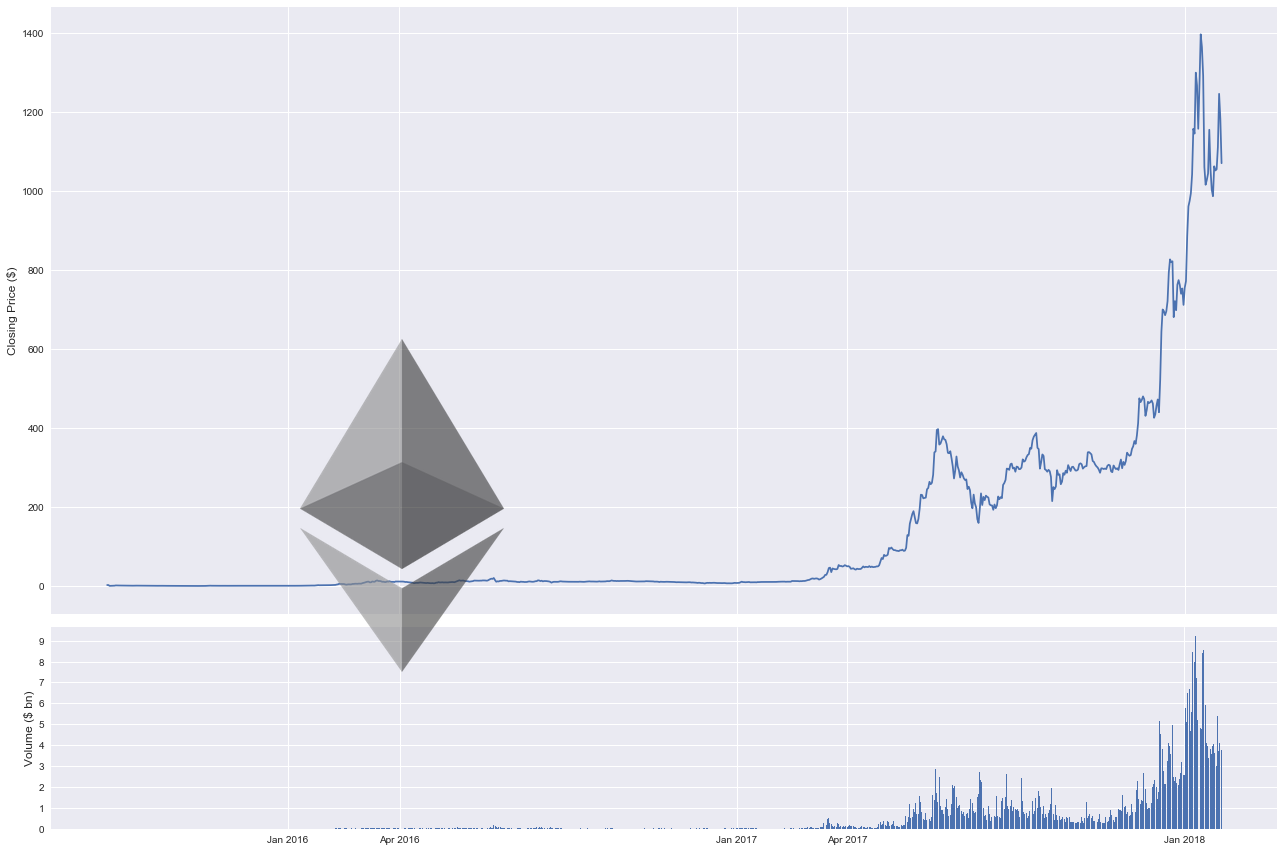

In [12]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]}, figsize = (18,12))
#ax1.set_yscale('log')
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2016,2019) for j in [1,4]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2016,2019) for j in [1,4]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2016,2019) for j in [1,4]])
ax1.plot(ethereum_market_info['Date'].astype(datetime.datetime),ethereum_market_info['eth_Open'])
ax2.bar(ethereum_market_info['Date'].astype(datetime.datetime).values, ethereum_market_info['eth_Volume'].values)
fig.tight_layout()
fig.figimage(eth_im, 300, 180, zorder=3, alpha=.6)
plt.show()

# Decred Price and Volume 

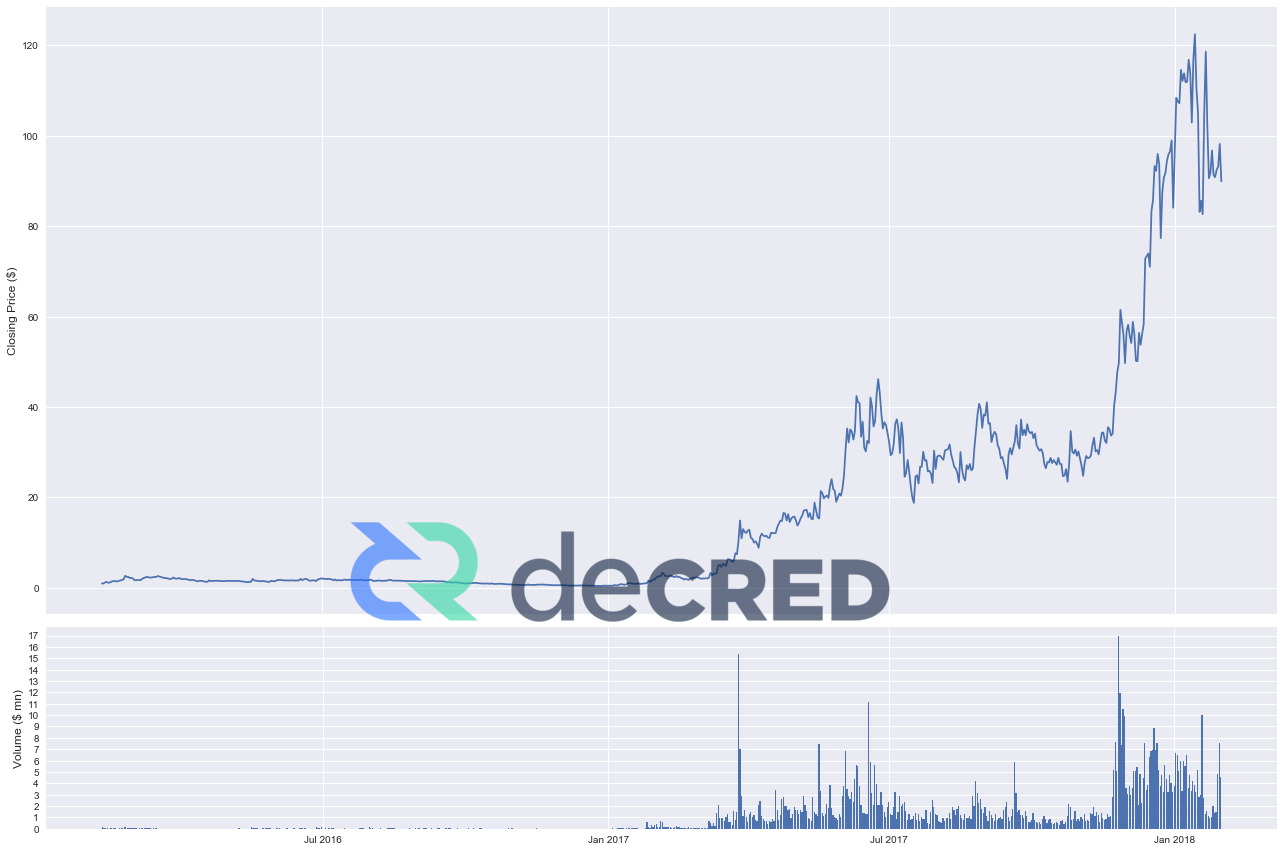

In [13]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]}, figsize = (18,12))
#ax1.set_yscale('log')
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ mn)',fontsize=12)
ax2.set_yticks([int('%d000000'%i) for i in range(19)])
ax2.set_yticklabels(range(19))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(decred_market_info['Date'].astype(datetime.datetime),decred_market_info['decr_Open'])
ax2.bar(decred_market_info['Date'].astype(datetime.datetime).values, decred_market_info['decr_Volume'].values)
fig.tight_layout()
fig.figimage(decr_im, 300, 180, zorder=3, alpha=.6)
plt.show()

# Tron Price and Volume

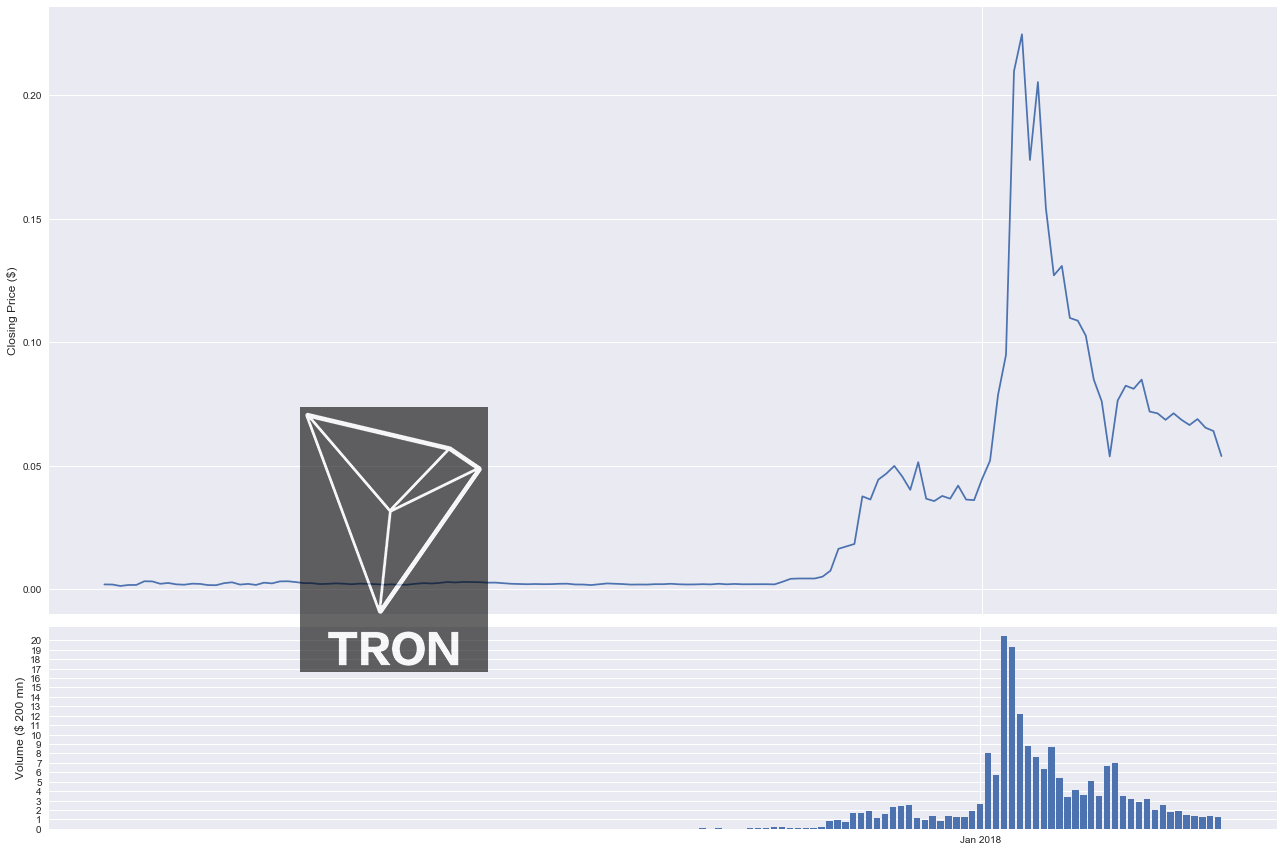

In [14]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]}, figsize = (18,12))
MaxVal = max(tron_market_info['tron_Volume'].values)
#ax1.set_yscale('log')
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ 200 mn)',fontsize=12)
ax2.set_yticks([i for i in range(0, MaxVal, 200000000)])
ax2.set_yticklabels([i//200000000 for i in range(0, MaxVal, 200000000)])
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(tron_market_info['Date'].astype(datetime.datetime),tron_market_info['tron_Open'])
ax2.bar(tron_market_info['Date'].astype(datetime.datetime).values, tron_market_info['tron_Volume'].values)
fig.tight_layout()
fig.figimage(tron_im, 300, 180, zorder=3, alpha=.6)
plt.show()

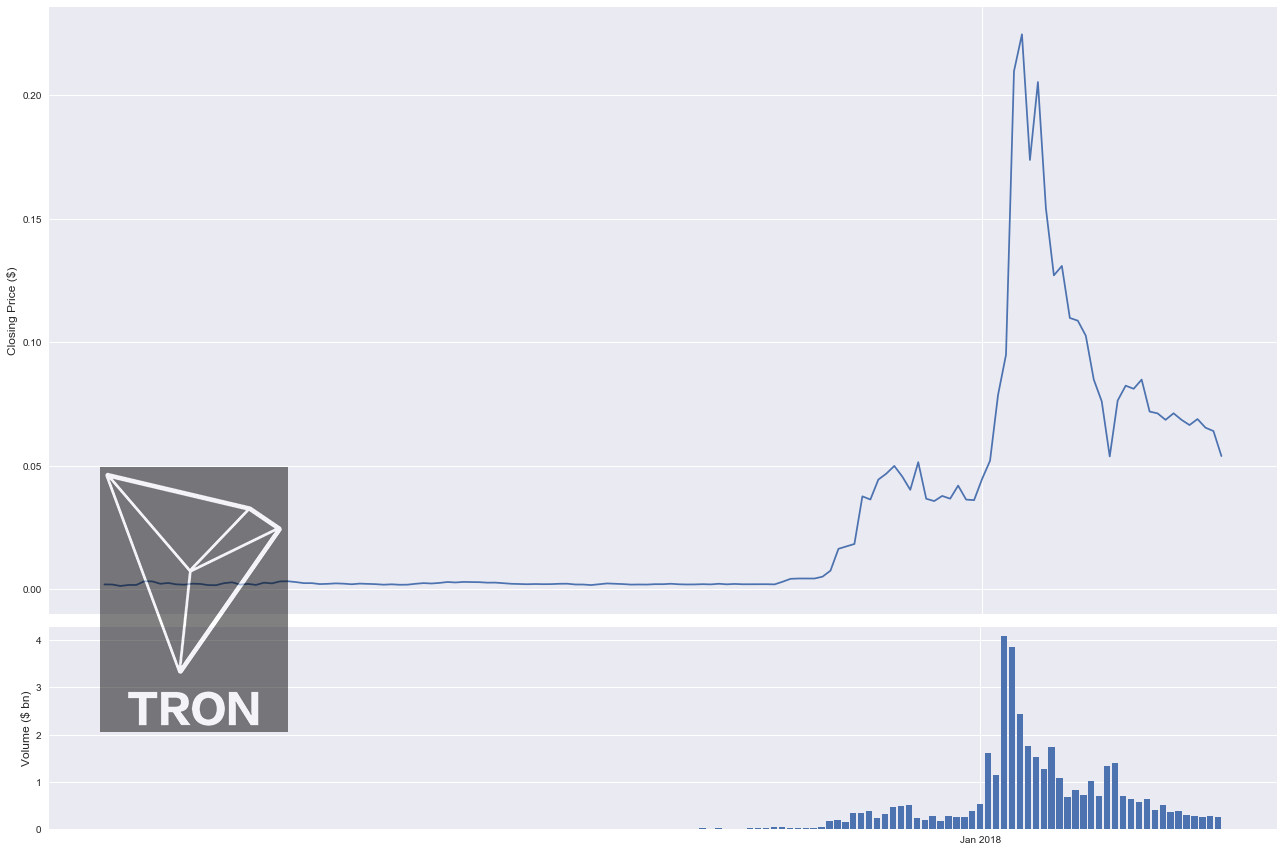

In [15]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]}, figsize = (18,12))
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(6)])
ax2.set_yticklabels(range(6))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(tron_market_info['Date'].astype(datetime.datetime),tron_market_info['tron_Open'])
ax2.bar(tron_market_info['Date'].astype(datetime.datetime).values, tron_market_info['tron_Volume'].values)
fig.tight_layout()
fig.figimage(tron_im, 100, 120, zorder=3,alpha=.5)
plt.show()

In [16]:
market_info = pd.merge(bitcoin_market_info,ethereum_market_info, on=['Date'])
#market_info = pd.merge(market_info,decred_market_info, on=['Date'])
#market_info = pd.merge(market_info,tron_market_info, on=['Date'])
market_info = market_info[market_info['Date']>='2016-01-01']
for coins in ['bt_', 'eth_']: 
    kwargs = { coins+'day_diff': lambda x: (x[coins+'Close']-x[coins+'Open'])/x[coins+'Open']}
    market_info = market_info.assign(**kwargs)
market_info.head()

,Date,bt_Open,bt_High,bt_Low,bt_Close,bt_Volume,bt_Market Cap,eth_Open,eth_High,eth_Low,eth_Close,eth_Volume,eth_Market Cap,bt_day_diff,eth_day_diff
0,2018-01-31,10108.2,10381.6,9777.42,10221.1,8041160000,170183000000,1071.09,1128.66,1034.50,1118.31,3757560000,104231000000,0.011169,0.044086
1,2018-01-30,11306.8,11307.2,10036.20,10106.3,8637860000,190339000000,1184.13,1184.63,1058.97,1071.13,4107860000,115207000000,-0.106175,-0.095429
2,2018-01-29,11755.5,11875.6,11179.20,11296.4,7107360000,197871000000,1246.70,1256.70,1169.08,1182.36,3715080000,121269000000,-0.039054,-0.051608
3,2018-01-28,11475.3,12040.3,11475.30,11786.3,8350360000,193133000000,1111.78,1257.77,1111.78,1246.01,5372330000,108122000000,0.027102,0.120734
4,2018-01-27,11174.9,11614.9,10989.20,11440.7,7583270000,188054000000,1055.75,1121.98,1042.12,1107.07,3002870000,102651000000,0.023785,0.048610


In [17]:
market2_info = pd.merge(decred_market_info,tron_market_info, on=['Date'])

market2_info = market2_info[market2_info['Date']>='2015-12-01']
for coins in ['decr_', 'tron_']: 
    kwargs = { coins+'day_diff': lambda x: (x[coins+'Close']-x[coins+'Open'])/x[coins+'Open']}
    market2_info = market2_info.assign(**kwargs)
market2_info.head()

,Date,decr_Open,decr_High,decr_Low,decr_Close,decr_Volume,decr_Market Cap,tron_Open,tron_High,tron_Low,tron_Close,tron_Volume,tron_Market Cap,decr_day_diff,tron_day_diff
0,2018-01-31,89.90,100.39,88.22,97.83,4526180,598813000,0.053958,0.054454,0.049636,0.054454,251081000,3547640000,0.088209,0.009192
1,2018-01-30,98.17,102.88,88.60,89.28,7570670,653214000,0.064065,0.064120,0.051582,0.053761,267126000,4212160000,-0.090557,-0.160837
2,2018-01-29,93.15,98.73,88.10,98.73,4818180,619241000,0.065431,0.066769,0.063113,0.064001,256876000,4302000000,0.059903,-0.021855
3,2018-01-28,92.44,96.19,90.87,93.24,1520330,613974000,0.068916,0.070875,0.065049,0.065495,276321000,4531100000,0.008654,-0.049640
4,2018-01-27,90.83,94.92,87.86,92.12,1407310,602601000,0.066495,0.069426,0.064973,0.068422,282557000,4371910000,0.014202,0.028980


# Model Split into Training, Testing

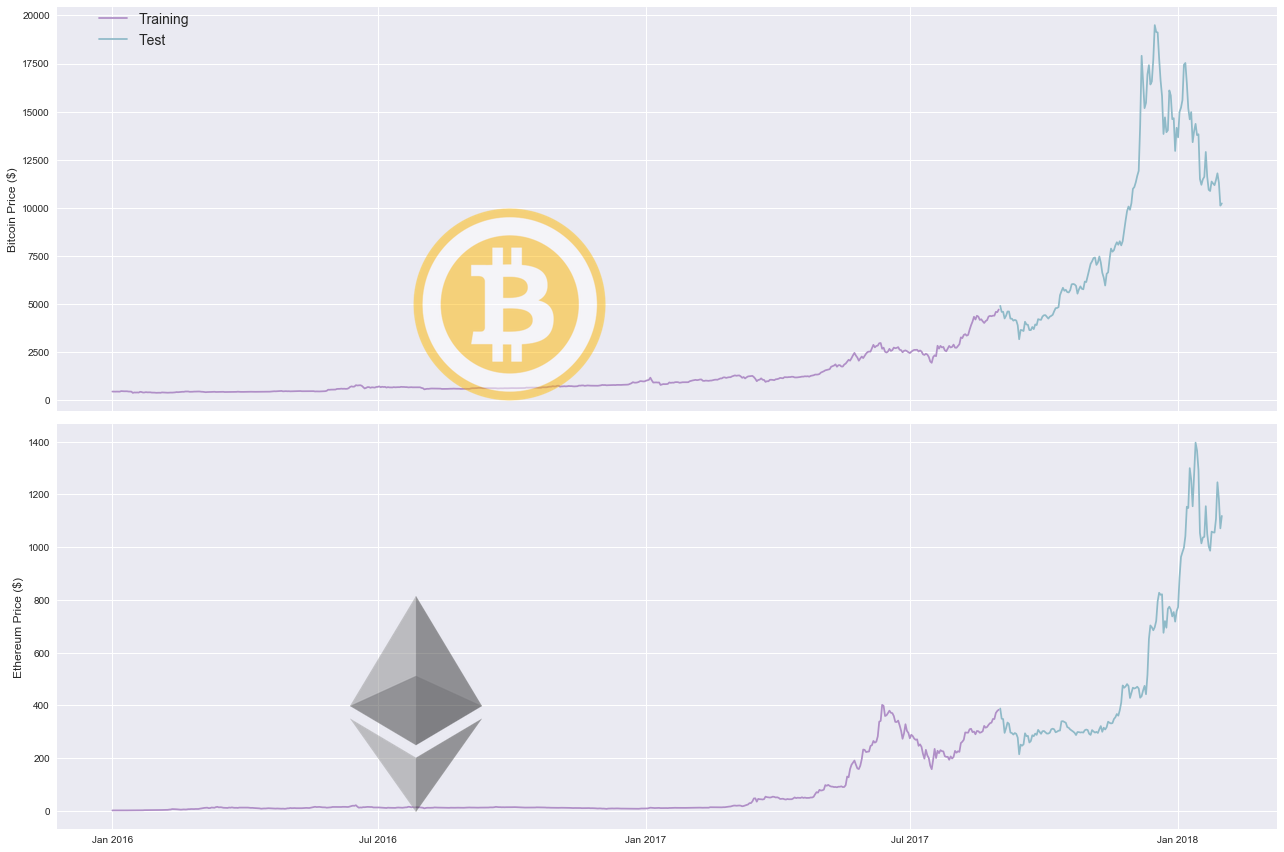

In [18]:
split_date = '2017-09-01'
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (18,12))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(market_info[market_info['Date'] < split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] < split_date]['bt_Close'], 
         color='#B08FC7', label='Training')
ax1.plot(market_info[market_info['Date'] >= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] >= split_date]['bt_Close'], 
         color='#8FBAC8', label='Test')
ax2.plot(market_info[market_info['Date'] < split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] < split_date]['eth_Close'], 
         color='#B08FC7')
ax2.plot(market_info[market_info['Date'] >= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date'] >= split_date]['eth_Close'], color='#8FBAC8')
ax1.set_xticklabels('')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
plt.tight_layout()
ax1.legend(bbox_to_anchor=(0.03, 1), loc=2, borderaxespad=0., prop={'size': 14})
fig.figimage(bitcoin_im.resize((int(bitcoin_im.size[0]*0.65), int(bitcoin_im.size[1]*0.65)), Image.ANTIALIAS), 
             300, 390, zorder=3,alpha=.5)
fig.figimage(eth_im.resize((int(eth_im.size[0]*0.65), int(eth_im.size[1]*0.65)), Image.ANTIALIAS), 
             350, 40, zorder=3,alpha=.5)
plt.show()

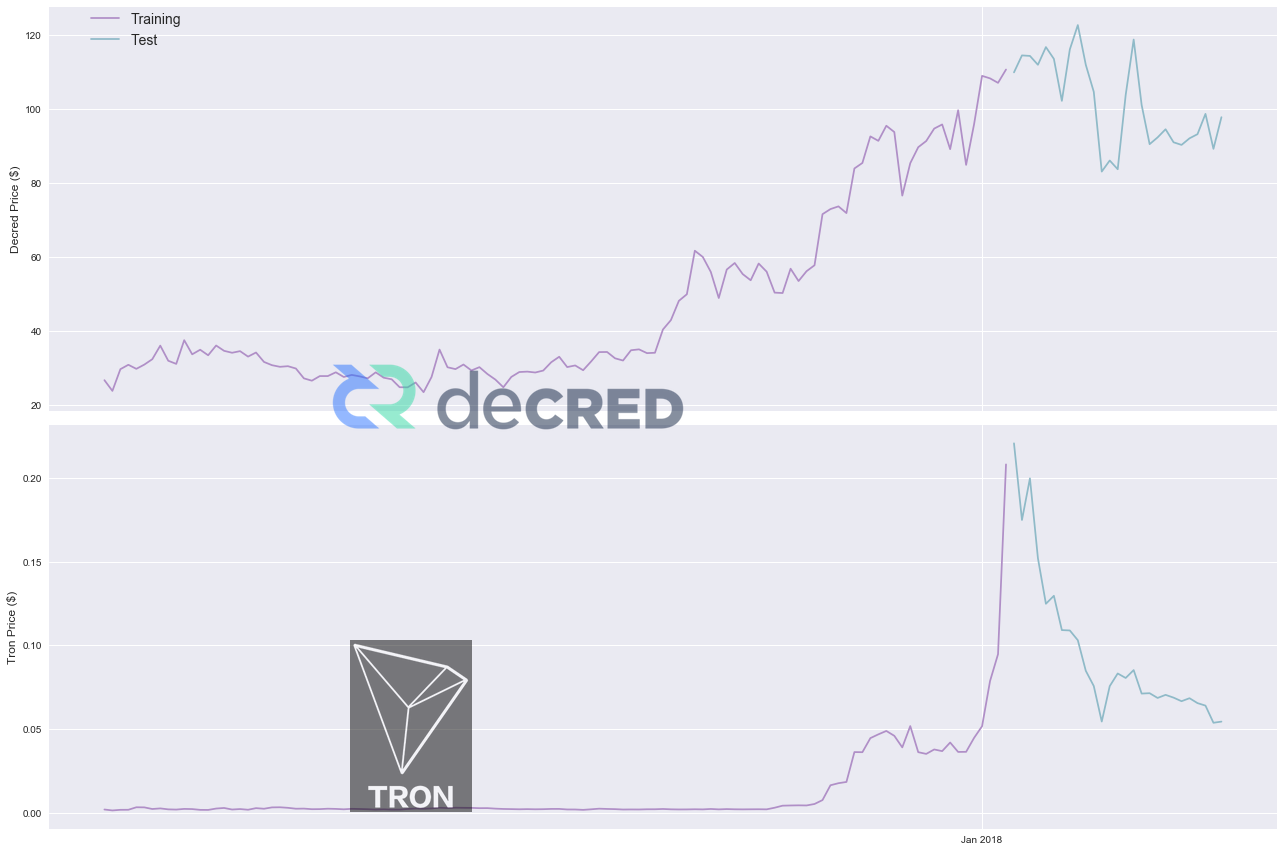

In [19]:
split_date = '2018-01-05'
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (18,12))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(market2_info[market2_info['Date'] < split_date]['Date'].astype(datetime.datetime),
         market2_info[market2_info['Date'] < split_date]['decr_Close'], 
         color='#B08FC7', label='Training')
ax1.plot(market2_info[market2_info['Date'] >= split_date]['Date'].astype(datetime.datetime),
         market2_info[market2_info['Date'] >= split_date]['decr_Close'], 
         color='#8FBAC8', label='Test')
ax2.plot(market2_info[market2_info['Date'] < split_date]['Date'].astype(datetime.datetime),
         market2_info[market2_info['Date'] < split_date]['tron_Close'], 
         color='#B08FC7')
ax2.plot(market2_info[market2_info['Date'] >= split_date]['Date'].astype(datetime.datetime),
         market2_info[market2_info['Date'] >= split_date]['tron_Close'], color='#8FBAC8')
ax1.set_xticklabels('')
ax1.set_ylabel('Decred Price ($)',fontsize=12)
ax2.set_ylabel('Tron Price ($)',fontsize=12)
plt.tight_layout()
ax1.legend(bbox_to_anchor=(0.03, 1), loc=2, borderaxespad=0., prop={'size': 14})
fig.figimage(decr_im.resize((int(decr_im.size[0]*0.65), int(decr_im.size[1]*0.65)), Image.ANTIALIAS), 
             300, 390, zorder=3,alpha=.5)
fig.figimage(tron_im.resize((int(tron_im.size[0]*0.65), int(tron_im.size[1]*0.65)), Image.ANTIALIAS), 
             350, 40, zorder=3,alpha=.5)
plt.show()

# 1 day Lag Model

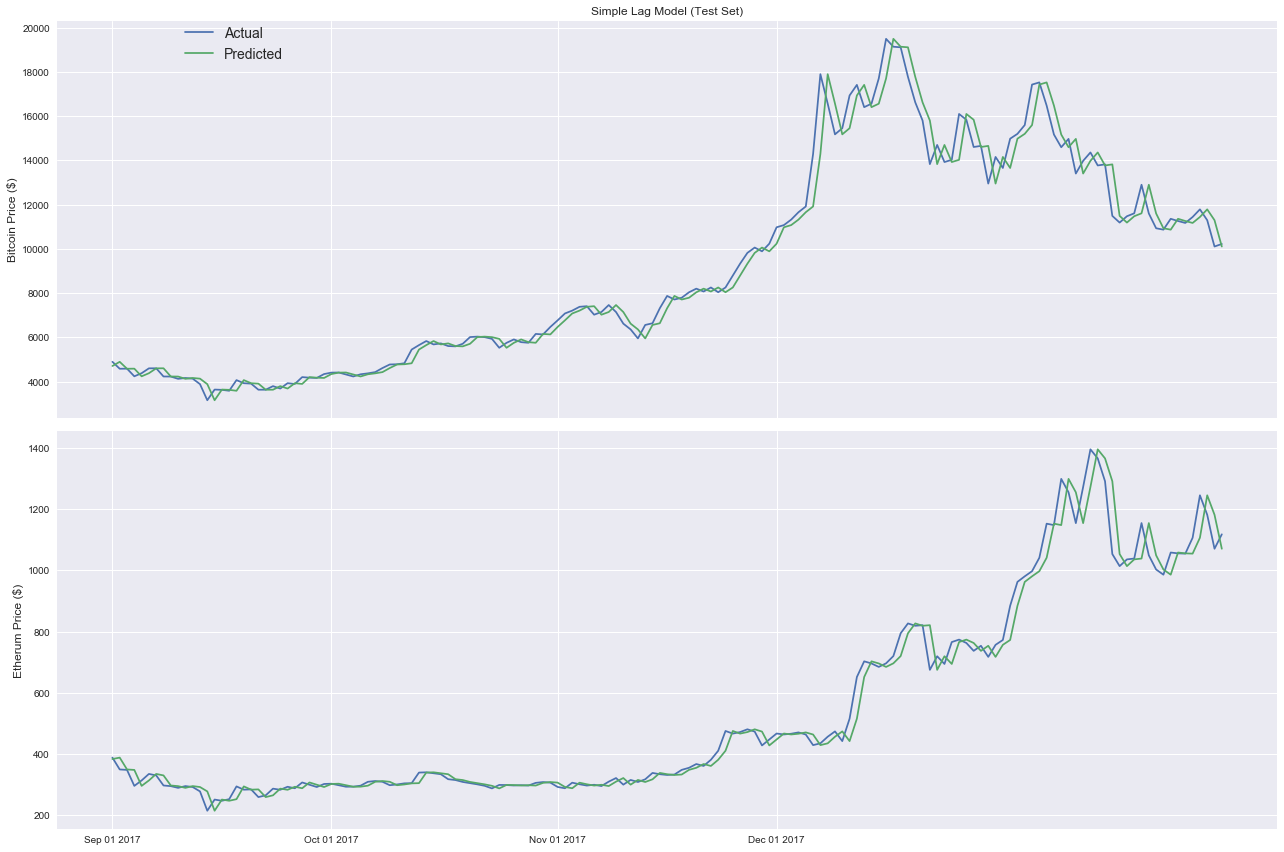

In [20]:
split_date = '2017-09-01'
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (18,12))
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['bt_Close'].values, label='Actual')
ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market_info[market_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                      datetime.timedelta(days=1)]['bt_Close'][1:].values, label='Predicted')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.set_title('Simple Lag Model (Test Set)')
ax2.set_ylabel('Etherum Price ($)',fontsize=12)
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market_info[market_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                      datetime.timedelta(days=1)]['eth_Close'][1:].values, label='Predicted')
fig.tight_layout()
plt.show()

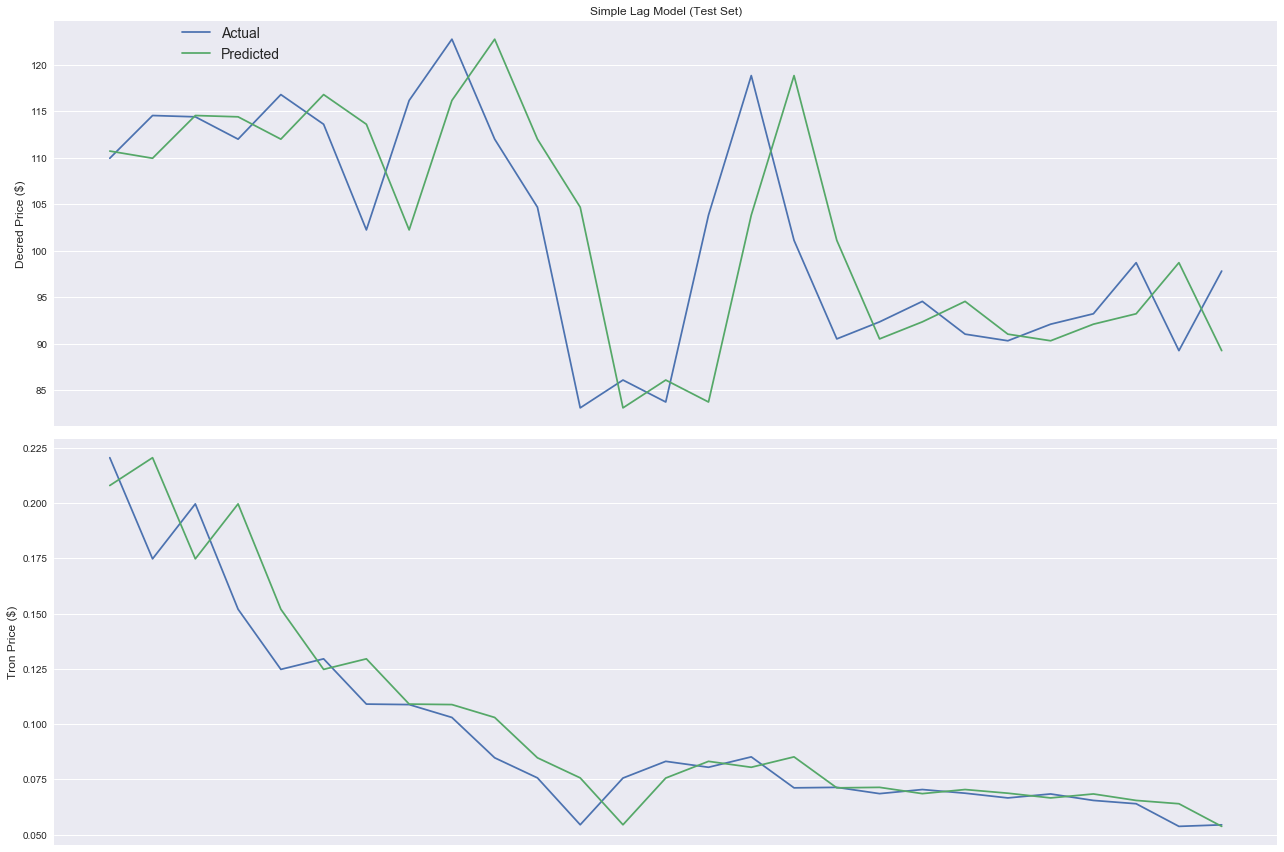

In [21]:
split_date = '2018-01-05'
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (18,12))
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(market2_info[market2_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market2_info[market2_info['Date']>= split_date]['decr_Close'].values, label='Actual')
ax1.plot(market2_info[market2_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market2_info[market2_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                      datetime.timedelta(days=1)]['decr_Close'][1:].values, label='Predicted')
ax1.set_ylabel('Decred Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.set_title('Simple Lag Model (Test Set)')
ax2.set_ylabel('Tron Price ($)',fontsize=12)
ax2.plot(market2_info[market2_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         market2_info[market2_info['Date']>= split_date]['tron_Close'].values, label='Actual')
ax2.plot(market2_info[market2_info['Date']>= split_date]['Date'].astype(datetime.datetime),
          market2_info[market2_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                      datetime.timedelta(days=1)]['tron_Close'][1:].values, label='Predicted')
fig.tight_layout()
plt.show()

# Random Walk model using actual Price

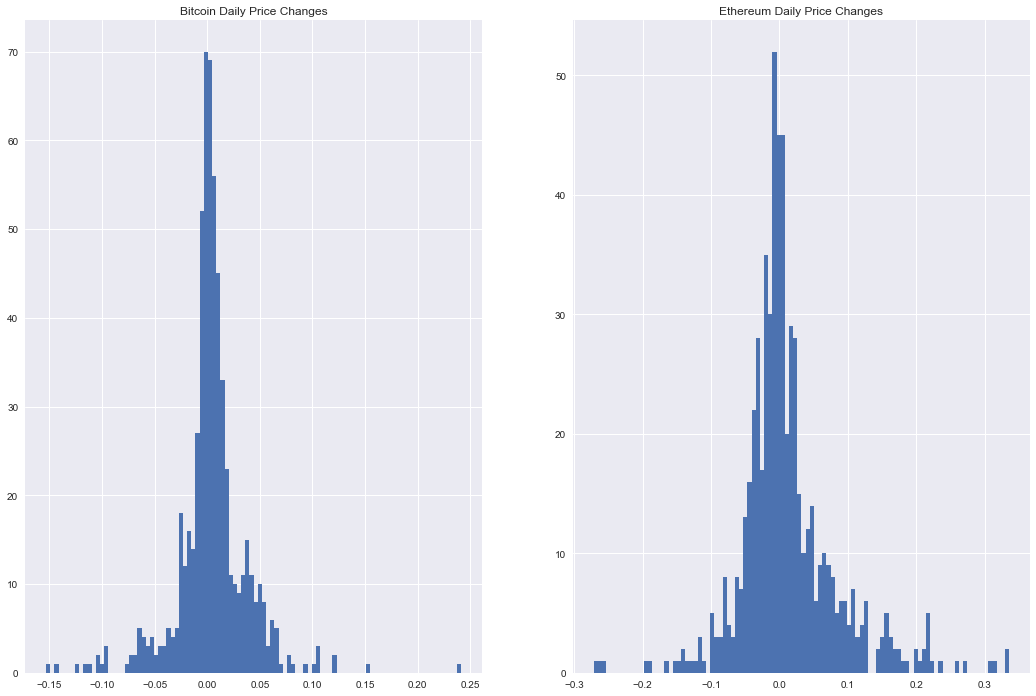

In [22]:
split_date = '2017-09-01'
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (18,12))
ax1.hist(market_info[market_info['Date']< split_date]['bt_day_diff'].values, bins=100)
ax2.hist(market_info[market_info['Date']< split_date]['eth_day_diff'].values, bins=100)
ax1.set_title('Bitcoin Daily Price Changes')
ax2.set_title('Ethereum Daily Price Changes')
plt.show()

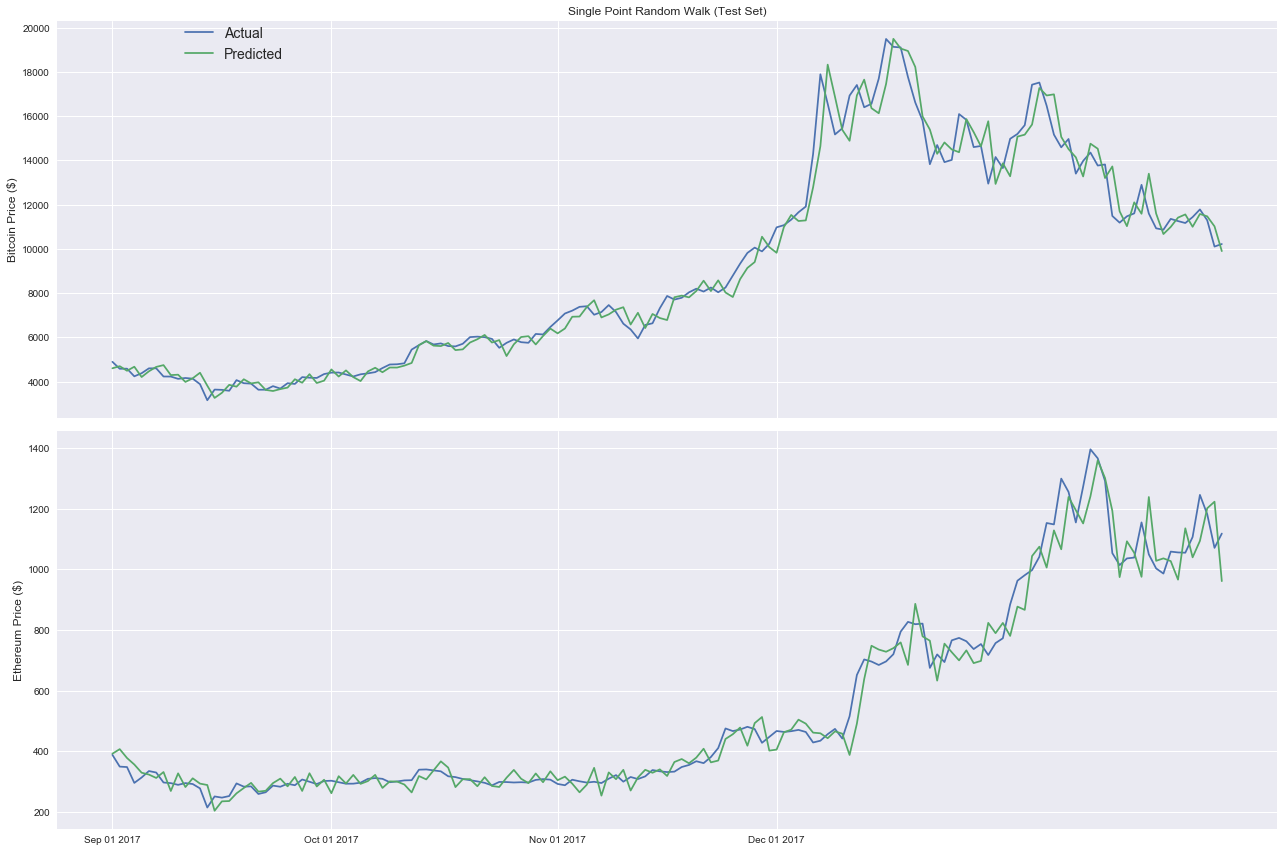

In [23]:
np.random.seed(202)
split_date = '2017-09-01'

bt_r_walk_mean, bt_r_walk_sd = np.mean(market_info[market_info['Date']< split_date]['bt_day_diff'].values), \
                         np.std(market_info[market_info['Date']< split_date]['bt_day_diff'].values)
bt_random_steps = np.random.normal(bt_r_walk_mean, bt_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
eth_r_walk_mean, eth_r_walk_sd = np.mean(market_info[market_info['Date']< split_date]['eth_day_diff'].values), \
                         np.std(market_info[market_info['Date']< split_date]['eth_day_diff'].values)
eth_random_steps = np.random.normal(eth_r_walk_mean, eth_r_walk_sd, 
                (max(market_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (18,12))
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])

ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
     market_info[market_info['Date']>= split_date]['bt_Close'].values, label='Actual')

ax1.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
     market_info[market_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                      datetime.timedelta(days=1)]['bt_Close'][1:].values * (1+bt_random_steps) , label='Predicted')

ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
     market_info[market_info['Date']>= split_date]['eth_Close'].values, label='Actual')

ax2.plot(market_info[market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
     market_info[market_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                      datetime.timedelta(days=1)]['eth_Close'][1:].values * (1+eth_random_steps) , label='Predicted')

ax1.set_title('Single Point Random Walk (Test Set)')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.tight_layout()
plt.show()

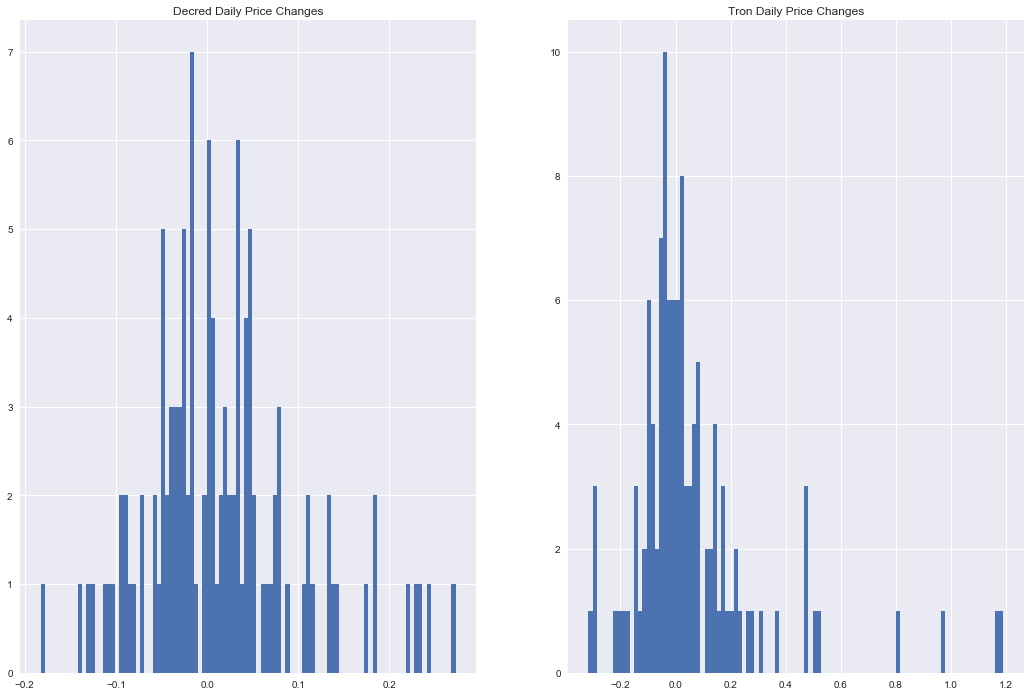

In [24]:
split_date = '2018-01-05'
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (18,12))
ax1.hist(market2_info[market2_info['Date']< split_date]['decr_day_diff'].values, bins=100)
ax2.hist(market2_info[market2_info['Date']< split_date]['tron_day_diff'].values, bins=100)
ax1.set_title('Decred Daily Price Changes')
ax2.set_title('Tron Daily Price Changes')
plt.show()

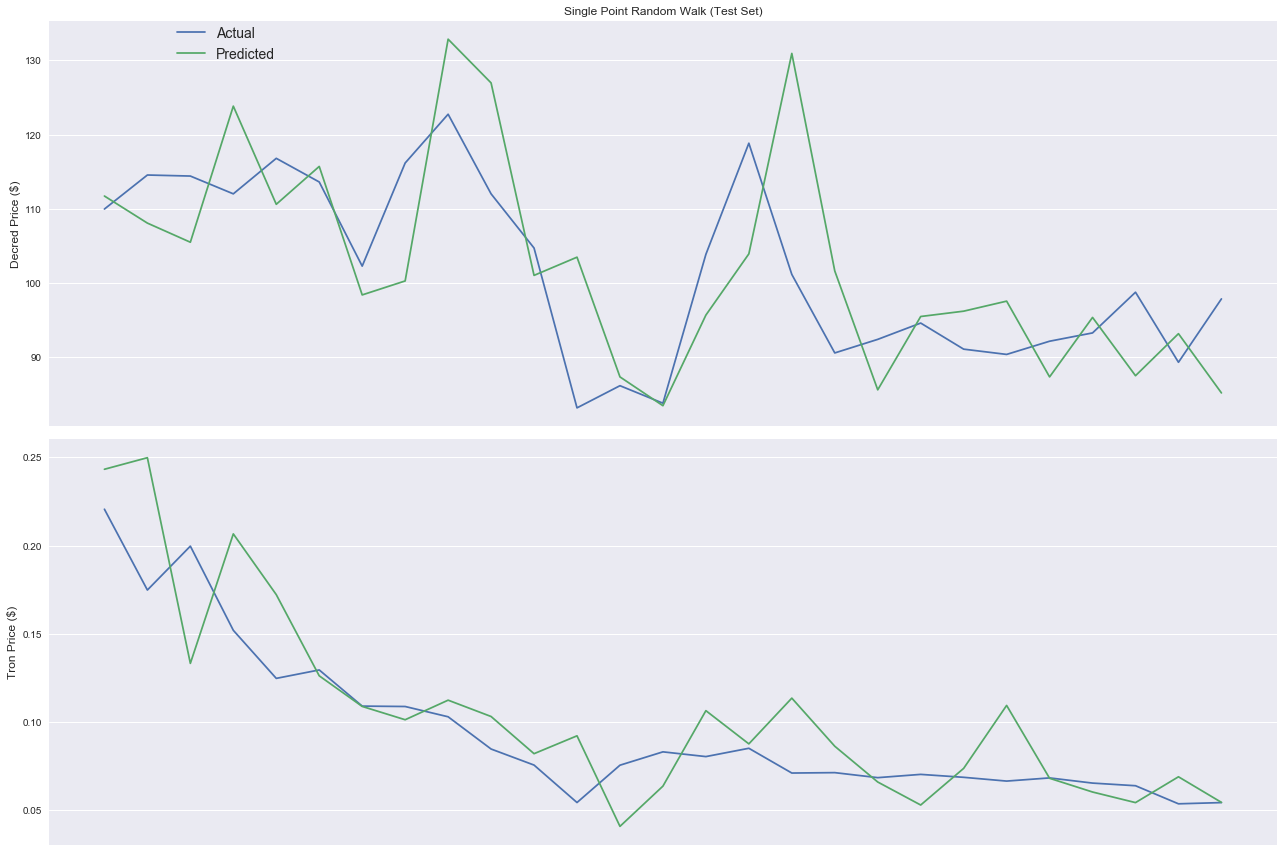

In [25]:
np.random.seed(202)
split_date = '2018-01-05'

decr_r_walk_mean, decr_r_walk_sd = np.mean(market2_info[market2_info['Date']< split_date]['decr_day_diff'].values), \
                         np.std(market2_info[market2_info['Date']< split_date]['decr_day_diff'].values)
decr_random_steps = np.random.normal(decr_r_walk_mean, decr_r_walk_sd, 
                (max(market2_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)

tron_r_walk_mean, tron_r_walk_sd = np.mean(market2_info[market2_info['Date']< split_date]['tron_day_diff'].values), \
                         np.std(market2_info[market2_info['Date']< split_date]['tron_day_diff'].values)
tron_random_steps = np.random.normal(tron_r_walk_mean, tron_r_walk_sd, 
                (max(market2_info['Date']).to_pydatetime() - datetime.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (18,12))
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])

ax1.plot(market2_info[market2_info['Date']>= split_date]['Date'].astype(datetime.datetime),
     market2_info[market2_info['Date']>= split_date]['decr_Close'].values, label='Actual')

ax1.plot(market2_info[market2_info['Date']>= split_date]['Date'].astype(datetime.datetime),
     market2_info[market2_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                      datetime.timedelta(days=1)]['decr_Close'][1:].values * (1+decr_random_steps) , label='Predicted')

ax2.plot(market2_info[market2_info['Date']>= split_date]['Date'].astype(datetime.datetime),
     market2_info[market2_info['Date']>= split_date]['tron_Close'].values, label='Actual')

ax2.plot(market2_info[market2_info['Date']>= split_date]['Date'].astype(datetime.datetime),
     market2_info[market2_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                      datetime.timedelta(days=1)]['tron_Close'][1:].values * (1+tron_random_steps) , label='Predicted')

ax1.set_title('Single Point Random Walk (Test Set)')
ax1.set_ylabel('Decred Price ($)',fontsize=12)
ax2.set_ylabel('Tron Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.tight_layout()
plt.show()

# LSTM Model

In [26]:
for coins in ['bt_', 'eth_']: 
    kwargs = { coins+'close_off_high': lambda x: 2*(x[coins+'High']- x[coins+'Close'])/(x[coins+'High']-x[coins+'Low'])-1,
            coins+'volatility': lambda x: (x[coins+'High']- x[coins+'Low'])/(x[coins+'Open'])}
    market_info = market_info.assign(**kwargs)

In [27]:
for coins in ['decr_', 'tron_']: 
    kwargs = { coins+'close_off_high': lambda x: 2*(x[coins+'High']- x[coins+'Close'])/(x[coins+'High']-x[coins+'Low'])-1,
            coins+'volatility': lambda x: (x[coins+'High']- x[coins+'Low'])/(x[coins+'Open'])}
    market2_info = market2_info.assign(**kwargs)

In [28]:
model_data = market_info[['Date']+[coin+metric for coin in ['bt_', 'eth_'] 
                                   for metric in ['Close','Volume','close_off_high','volatility']]]
# need to reverse the data frame so that subsequent rows represent later timepoints
model_data = model_data.sort_values(by='Date')
model_data.head()

,Date,bt_Close,bt_Volume,bt_close_off_high,bt_volatility,eth_Close,eth_Volume,eth_close_off_high,eth_volatility
761,2016-01-01,434.33,36278900,-0.560641,0.020292,0.948024,206062,-0.418477,0.025040
760,2016-01-02,433.44,30096600,0.250597,0.009641,0.937124,255504,0.965898,0.034913
759,2016-01-03,430.01,39633800,-0.173865,0.020827,0.971905,407632,-0.317885,0.060792
758,2016-01-04,433.09,38477500,-0.474265,0.012649,0.954480,346245,-0.057657,0.047943
757,2016-01-05,431.96,34522600,-0.013333,0.010391,0.950176,219833,0.697930,0.025236


In [29]:
# Dropping Date Column
split_date = '2017-09-01'
training_set, test_set = model_data[model_data['Date']<split_date], model_data[model_data['Date']>=split_date]
training_set = training_set.drop('Date', 1)
test_set = test_set.drop('Date', 1)

In [30]:
# How many previous days to consider in LSTM Model
window_len = 10
norm_cols = [coin+metric for coin in ['bt_', 'eth_'] for metric in ['Close','Volume']]

In [31]:
LSTM_training_inputs = []
for i in range(len(training_set)-window_len):
    temp_set = training_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_training_inputs.append(temp_set)
LSTM_training_outputs = (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1

In [32]:
LSTM_test_inputs = []
for i in range(len(test_set)-window_len):
    temp_set = test_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_test_inputs.append(temp_set)
LSTM_test_outputs = (test_set['eth_Close'][window_len:].values/test_set['eth_Close'][:-window_len].values)-1

In [33]:
LSTM_training_inputs[0]

,bt_Close,bt_Volume,bt_close_off_high,bt_volatility,eth_Close,eth_Volume,eth_close_off_high,eth_volatility
761,0.000000,0.000000,-0.560641,0.020292,0.000000,0.000000,-0.418477,0.025040
760,-0.002049,-0.170410,0.250597,0.009641,-0.011498,0.239937,0.965898,0.034913
759,-0.009946,0.092475,-0.173865,0.020827,0.025190,0.978201,-0.317885,0.060792
758,-0.002855,0.060603,-0.474265,0.012649,0.006810,0.680295,-0.057657,0.047943
757,-0.005457,-0.048411,-0.013333,0.010391,0.002270,0.066829,0.697930,0.025236
756,-0.012019,-0.061645,-0.003623,0.012782,0.002991,0.498534,-0.214540,0.026263
755,0.054613,1.413585,-0.951499,0.069045,-0.006349,2.142074,0.681644,0.040587
754,0.043515,0.570968,0.294196,0.032762,0.040890,1.647747,-0.806717,0.055274
753,0.030576,-0.110282,0.814194,0.017094,0.040937,0.098121,-0.411897,0.019021
752,0.031451,-0.007801,-0.919598,0.017758,0.054014,0.896944,-0.938235,0.025266


In [34]:
LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
LSTM_training_inputs = np.array(LSTM_training_inputs)

LSTM_test_inputs = [np.array(LSTM_test_inputs) for LSTM_test_inputs in LSTM_test_inputs]
LSTM_test_inputs = np.array(LSTM_test_inputs)

In [35]:
# import the relevant Keras modules
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mse", optimizer="adam"):
    model = Sequential()

    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

Using TensorFlow backend.


BITCOIN MODEL

In [36]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
bt_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)

LSTM_training_outputs = (training_set['bt_Close'][window_len:].values/training_set['bt_Close'][:-window_len].values)-1

# train model on data
bt_history = bt_model.fit(LSTM_training_inputs, LSTM_training_outputs, epochs=50, batch_size=1, verbose=2, shuffle=True)


Epoch 1/50
 - 28s - loss: 0.0191
Epoch 2/50
 - 26s - loss: 0.0085
Epoch 3/50
 - 25s - loss: 0.0051
Epoch 4/50
 - 25s - loss: 0.0039
Epoch 5/50
 - 25s - loss: 0.0036
Epoch 6/50
 - 25s - loss: 0.0027
Epoch 7/50
 - 25s - loss: 0.0031
Epoch 8/50
 - 25s - loss: 0.0026
Epoch 9/50
 - 25s - loss: 0.0025
Epoch 10/50
 - 25s - loss: 0.0022
Epoch 11/50
 - 25s - loss: 0.0024
Epoch 12/50
 - 25s - loss: 0.0021
Epoch 13/50
 - 25s - loss: 0.0020
Epoch 14/50
 - 25s - loss: 0.0022
Epoch 15/50
 - 26s - loss: 0.0019
Epoch 16/50
 - 26s - loss: 0.0019
Epoch 17/50
 - 26s - loss: 0.0019
Epoch 18/50
 - 26s - loss: 0.0021
Epoch 19/50
 - 26s - loss: 0.0020
Epoch 20/50
 - 26s - loss: 0.0019
Epoch 21/50
 - 25s - loss: 0.0019
Epoch 22/50
 - 26s - loss: 0.0018
Epoch 23/50
 - 26s - loss: 0.0017
Epoch 24/50
 - 28s - loss: 0.0018
Epoch 25/50
 - 29s - loss: 0.0017
Epoch 26/50
 - 30s - loss: 0.0017
Epoch 27/50
 - 28s - loss: 0.0018
Epoch 28/50
 - 30s - loss: 0.0018
Epoch 29/50
 - 29s - loss: 0.0016
Epoch 30/50
 - 29s - lo

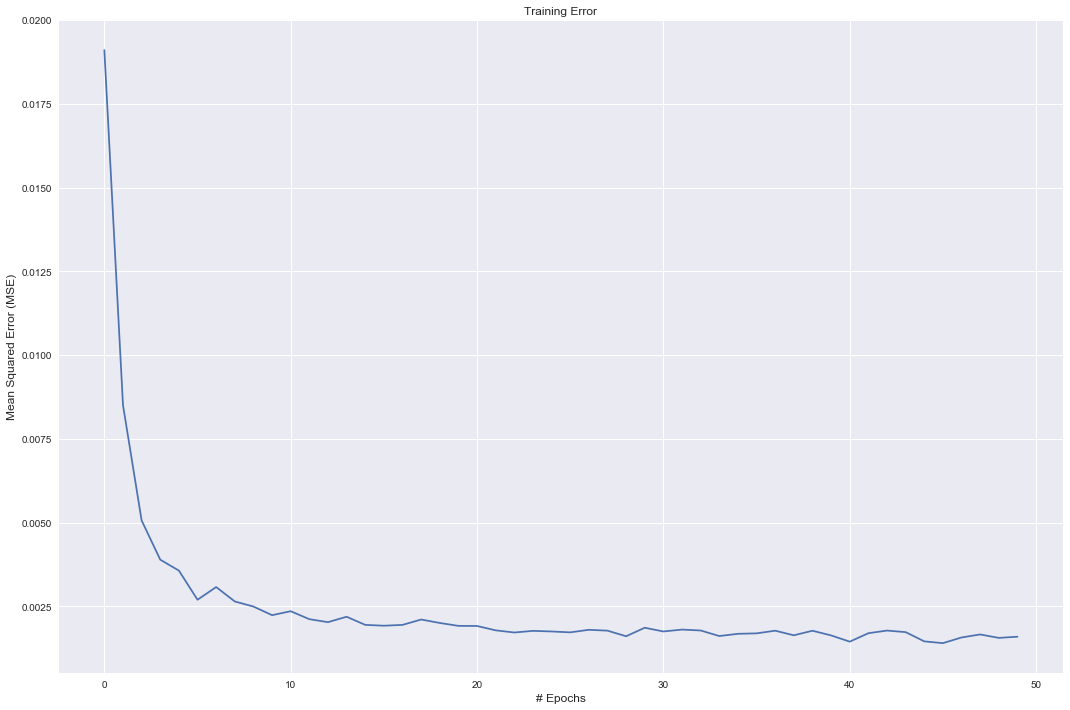

In [37]:
fig, ax1 = plt.subplots(1,1 , figsize = (18,12))

ax1.plot(bt_history.epoch, bt_history.history['loss'])
ax1.set_title('Training Error')

if bt_model.loss == 'mse':
    ax1.set_ylabel('Mean Squared Error (MSE)',fontsize=12)
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

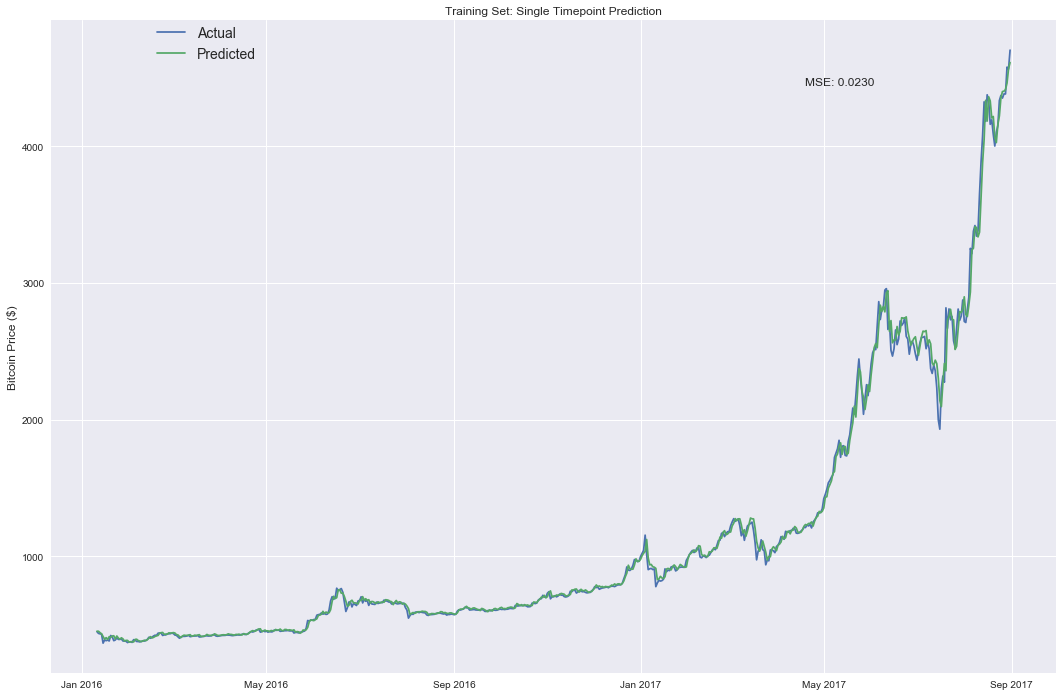

In [38]:
#from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
#from mpl_toolkits.axes_grid1.inset_locator import mark_inset

split_date = '2017-09-01'

fig, ax1 = plt.subplots(1,1, figsize = (18,12))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,5,9]])
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['bt_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_training_inputs))+1) * training_set['bt_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.set_title('Training Set: Single Timepoint Prediction')

ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.annotate('MSE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_training_inputs))+1)-\
            (training_set['bt_Close'].values[window_len:])/(training_set['bt_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')

ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
# figure inset code taken from http://akuederle.com/matplotlib-zoomed-up-inset
#axins = zoomed_inset_axes(ax1, 2.52, loc=10, bbox_to_anchor=(400, 307)) # zoom-factor: 2.52, location: centre
#axins.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
#axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
#         training_set['bt_Close'][window_len:], label='Actual')
#axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
#         ((np.transpose(bt_model.predict(LSTM_training_inputs))+1) * training_set['bt_Close'].values[:-window_len])[0], 
#         label='Predicted')

#axins.set_xlim([datetime.date(2017, 2, 15), datetime.date(2017, 5, 1)])
#axins.set_ylim([920, 1400])
#axins.set_xticklabels('')
#mark_inset(ax1, axins, loc1=1, loc2=3, fc="none", ec="0.5")
plt.show()

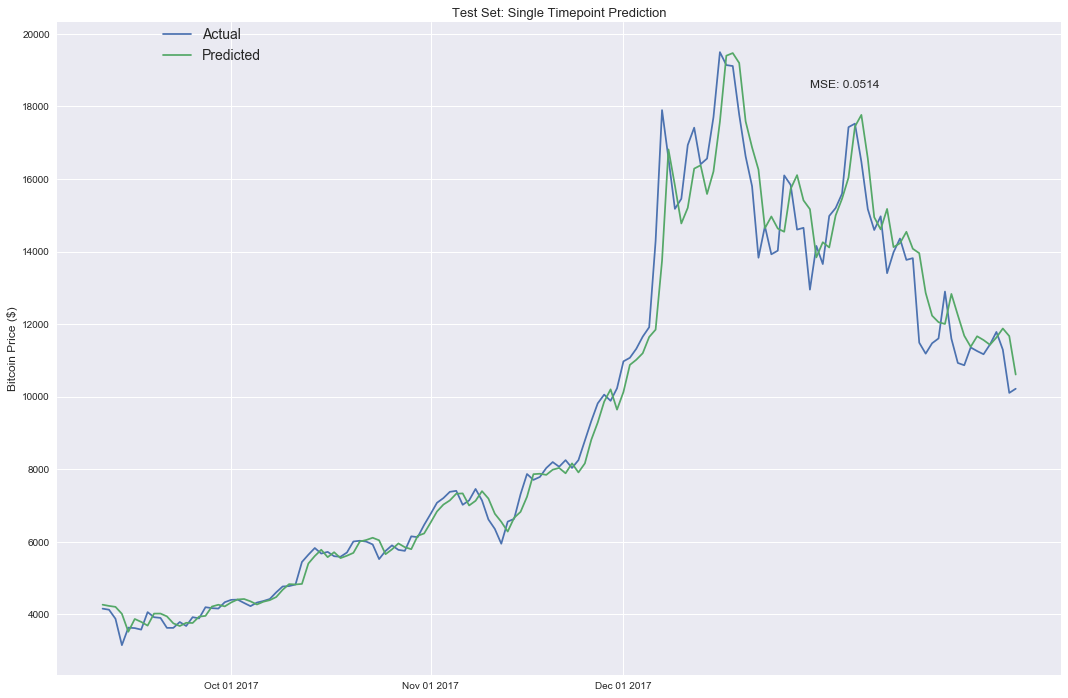

In [39]:
fig, ax1 = plt.subplots(1,1, figsize = (18,12)) 
split_date = '2017-09-01'
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][10:].astype(datetime.datetime),
         test_set['bt_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][10:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['bt_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.annotate('MSE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_test_inputs))+1)-\
            (test_set['bt_Close'].values[window_len:])/(test_set['bt_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

ETHEREUM MODEL

In [40]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
eth_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
# model output is next price normalised to 10th previous closing price
LSTM_training_outputs = (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1
# train model on data
# note: eth_history contains information on the training error per epoch
eth_history = eth_model.fit(LSTM_training_inputs, LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Epoch 1/50
 - 30s - loss: 0.0624
Epoch 2/50
 - 27s - loss: 0.0284
Epoch 3/50
 - 25s - loss: 0.0233
Epoch 4/50
 - 25s - loss: 0.0198
Epoch 5/50
 - 25s - loss: 0.0186
Epoch 6/50
 - 25s - loss: 0.0172
Epoch 7/50
 - 25s - loss: 0.0147
Epoch 8/50
 - 25s - loss: 0.0140
Epoch 9/50
 - 24s - loss: 0.0133
Epoch 10/50
 - 25s - loss: 0.0129
Epoch 11/50
 - 25s - loss: 0.0132
Epoch 12/50
 - 25s - loss: 0.0145
Epoch 13/50
 - 25s - loss: 0.0133
Epoch 14/50
 - 25s - loss: 0.0123
Epoch 15/50
 - 28s - loss: 0.0137
Epoch 16/50
 - 27s - loss: 0.0128
Epoch 17/50
 - 28s - loss: 0.0119
Epoch 18/50
 - 27s - loss: 0.0113
Epoch 19/50
 - 28s - loss: 0.0111
Epoch 20/50
 - 27s - loss: 0.0108
Epoch 21/50
 - 28s - loss: 0.0119
Epoch 22/50
 - 28s - loss: 0.0147
Epoch 23/50
 - 28s - loss: 0.0113
Epoch 24/50
 - 27s - loss: 0.0123
Epoch 25/50
 - 28s - loss: 0.0125
Epoch 26/50
 - 26s - loss: 0.0119
Epoch 27/50
 - 25s - loss: 0.0103
Epoch 28/50
 - 25s - loss: 0.0100
Epoch 29/50
 - 25s - loss: 0.0100
Epoch 30/50
 - 25s - lo

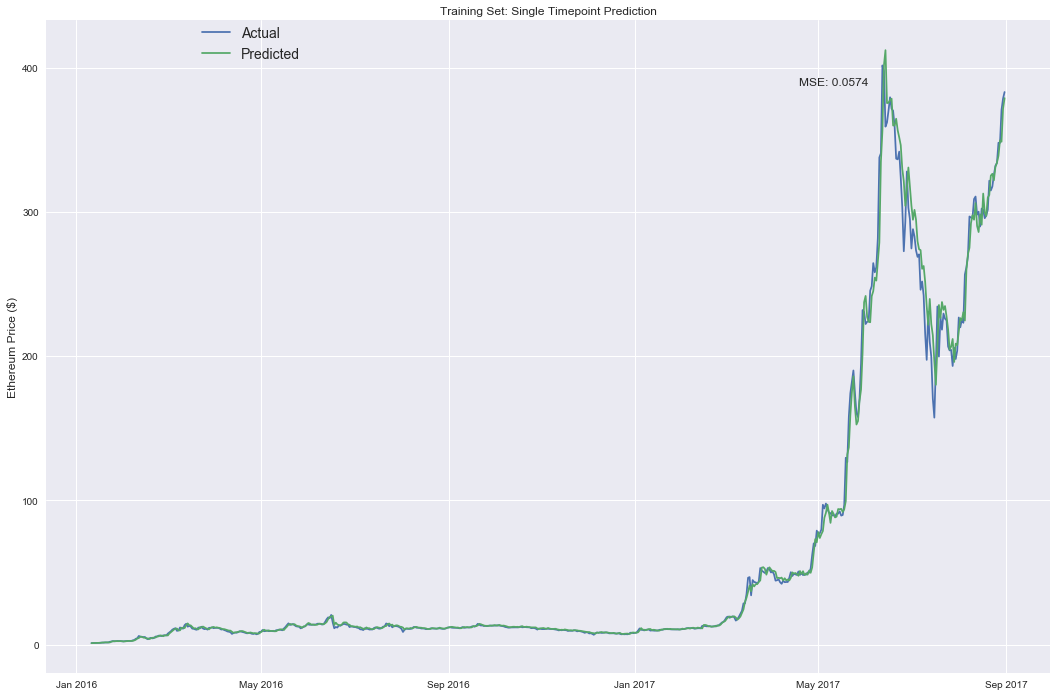

In [41]:
#from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
#from mpl_toolkits.axes_grid1.inset_locator import mark_inset

split_date = '2017-09-01'

fig, ax1 = plt.subplots(1,1, figsize = (18,12)) 
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,5,9]])
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['eth_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(eth_model.predict(LSTM_training_inputs))+1) * training_set['eth_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.set_title('Training Set: Single Timepoint Prediction')
ax1.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.15, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.annotate('MSE: %.4f'%np.mean(np.abs((np.transpose(eth_model.predict(LSTM_training_inputs))+1)-\
            (training_set['eth_Close'].values[window_len:])/(training_set['eth_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')

# figure inset code taken from http://akuederle.com/matplotlib-zoomed-up-inset
#axins = zoomed_inset_axes(ax1, 3.35, loc=10) # zoom-factor: 3.35, location: centre
#axins.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
#axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
#         training_set['eth_Close'][window_len:], label='Actual')
#axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
#         ((np.transpose(eth_model.predict(LSTM_training_inputs))+1) * training_set['eth_Close'].values[:-window_len])[0], 
#         label='Predicted')
#axins.set_xlim([datetime.date(2017, 3, 1), datetime.date(2017, 5, 1)])
#axins.set_ylim([10,60])
#axins.set_xticklabels('')
#mark_inset(ax1, axins, loc1=1, loc2=3, fc="none", ec="0.5")
plt.show()

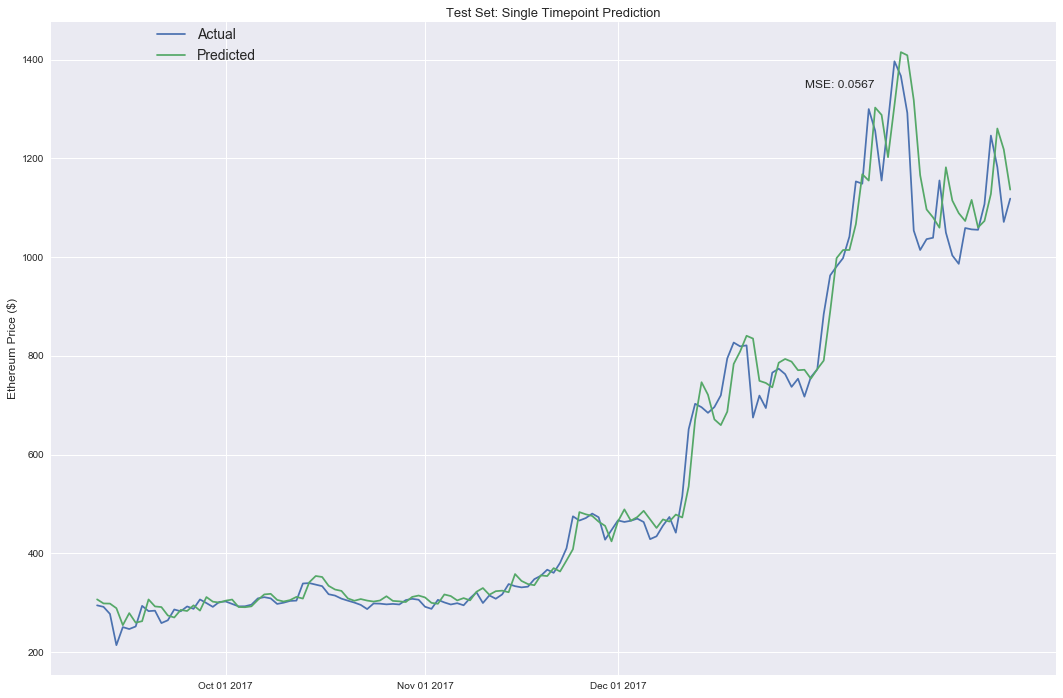

In [42]:
fig, ax1 = plt.subplots(1,1, figsize = (18,12)) 
split_date = '2017-09-01'
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
         test_set['eth_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(eth_model.predict(LSTM_test_inputs))+1) * test_set['eth_Close'].values[:-window_len])[0], 
         label='Predicted')

ax1.annotate('MSE: %.4f'%np.mean(np.abs((np.transpose(eth_model.predict(LSTM_test_inputs))+1)-\
            (test_set['eth_Close'].values[window_len:])/(test_set['eth_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

# Model 2 with Tron and Decred

In [52]:
model2_data = market2_info[['Date']+[coin+metric for coin in ['decr_', 'tron_'] 
                                   for metric in ['Close','Volume','close_off_high','volatility']]]

model2_data = model2_data.sort_values(by='Date')
model2_data.head()

,Date,decr_Close,decr_Volume,decr_close_off_high,decr_volatility,tron_Close,tron_Volume,tron_close_off_high,tron_volatility
140,2017-09-13,26.73,1649640,0.063830,0.170847,0.001988,48512,0.248304,0.359337
139,2017-09-14,23.83,1921540,0.335922,0.196415,0.001427,58770,0.781541,0.588734
138,2017-09-15,29.70,2353720,-0.680942,0.387552,0.001801,26475,-0.918919,0.521494
137,2017-09-16,30.89,1029260,0.082251,0.156187,0.001831,54535,0.943558,8.980716
136,2017-09-17,29.79,706172,0.159420,0.089349,0.003320,124998,-0.467112,1.142702


In [53]:
# Dropping Date Column
split_date = '2018-01-05'
training_set, test_set = model2_data[model2_data['Date']<split_date], model2_data[model2_data['Date']>=split_date]
training_set = training_set.drop('Date', 1)
test_set = test_set.drop('Date', 1)

In [54]:
# How many previous days to consider in LSTM Model
window_len = 10
norm_cols = [coin+metric for coin in ['decr_', 'tron_'] for metric in ['Close','Volume']]

In [55]:
LSTM_training_inputs = []
for i in range(len(training_set)-window_len):
    temp_set = training_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_training_inputs.append(temp_set)

In [56]:
LSTM_test_inputs = []
for i in range(len(test_set)-window_len):
    temp_set = test_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_test_inputs.append(temp_set)

In [57]:
LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
LSTM_training_inputs = np.array(LSTM_training_inputs)

LSTM_test_inputs = [np.array(LSTM_test_inputs) for LSTM_test_inputs in LSTM_test_inputs]
LSTM_test_inputs = np.array(LSTM_test_inputs)

DECRED MODEL

In [58]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
decr_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)

LSTM_training_outputs = (training_set['decr_Close'][window_len:].values/training_set['decr_Close'][:-window_len].values)-1

# train model on data
decr_history = decr_model.fit(LSTM_training_inputs, LSTM_training_outputs, epochs=50, batch_size=1, verbose=2, shuffle=True)


Epoch 1/50
 - 6s - loss: 0.1149
Epoch 2/50
 - 5s - loss: 0.0804
Epoch 3/50
 - 5s - loss: 0.0622
Epoch 4/50
 - 5s - loss: 0.0330
Epoch 5/50
 - 5s - loss: 0.0425
Epoch 6/50
 - 5s - loss: 0.0278
Epoch 7/50
 - 5s - loss: 0.0402
Epoch 8/50
 - 5s - loss: 0.0237
Epoch 9/50
 - 5s - loss: 0.0197
Epoch 10/50
 - 5s - loss: 0.0172
Epoch 11/50
 - 5s - loss: 0.0168
Epoch 12/50
 - 5s - loss: 0.0171
Epoch 13/50
 - 5s - loss: 0.0160
Epoch 14/50
 - 5s - loss: 0.0144
Epoch 15/50
 - 5s - loss: 0.0131
Epoch 16/50
 - 5s - loss: 0.0176
Epoch 17/50
 - 5s - loss: 0.0188
Epoch 18/50
 - 5s - loss: 0.0135
Epoch 19/50
 - 5s - loss: 0.0107
Epoch 20/50
 - 5s - loss: 0.0138
Epoch 21/50
 - 5s - loss: 0.0160
Epoch 22/50
 - 5s - loss: 0.0144
Epoch 23/50
 - 5s - loss: 0.0090
Epoch 24/50
 - 5s - loss: 0.0083
Epoch 25/50
 - 5s - loss: 0.0080
Epoch 26/50
 - 5s - loss: 0.0107
Epoch 27/50
 - 5s - loss: 0.0097
Epoch 28/50
 - 5s - loss: 0.0102
Epoch 29/50
 - 5s - loss: 0.0152
Epoch 30/50
 - 5s - loss: 0.0134
Epoch 31/50
 - 5s -

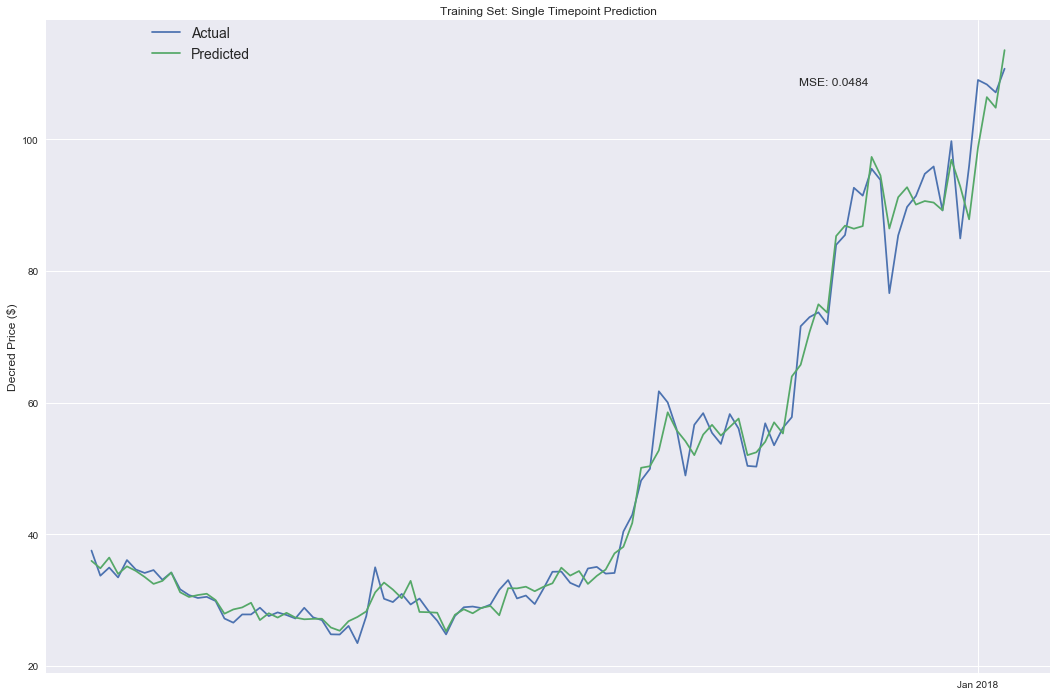

In [59]:
#from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
#from mpl_toolkits.axes_grid1.inset_locator import mark_inset

split_date = '2018-01-05'

fig, ax1 = plt.subplots(1,1, figsize = (18,12))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,5,9]])

ax1.plot(model2_data[model2_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['decr_Close'][window_len:], label='Actual')

ax1.plot(model2_data[model2_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(decr_model.predict(LSTM_training_inputs))+1) * training_set['decr_Close'].values[:-window_len])[0], 
         label='Predicted')

ax1.set_title('Training Set: Single Timepoint Prediction')

ax1.set_ylabel('Decred Price ($)',fontsize=12)
ax1.annotate('MSE: %.4f'%np.mean(np.abs((np.transpose(decr_model.predict(LSTM_training_inputs))+1)-\
            (training_set['decr_Close'].values[window_len:])/(training_set['decr_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')

ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
# figure inset code taken from http://akuederle.com/matplotlib-zoomed-up-inset
#axins = zoomed_inset_axes(ax1, 2.52, loc=10, bbox_to_anchor=(400, 307)) # zoom-factor: 2.52, location: centre
#axins.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
#axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
#         training_set['bt_Close'][window_len:], label='Actual')
#axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
#         ((np.transpose(bt_model.predict(LSTM_training_inputs))+1) * training_set['bt_Close'].values[:-window_len])[0], 
#         label='Predicted')

#axins.set_xlim([datetime.date(2017, 2, 15), datetime.date(2017, 5, 1)])
#axins.set_ylim([920, 1400])
#axins.set_xticklabels('')
#mark_inset(ax1, axins, loc1=1, loc2=3, fc="none", ec="0.5")
plt.show()

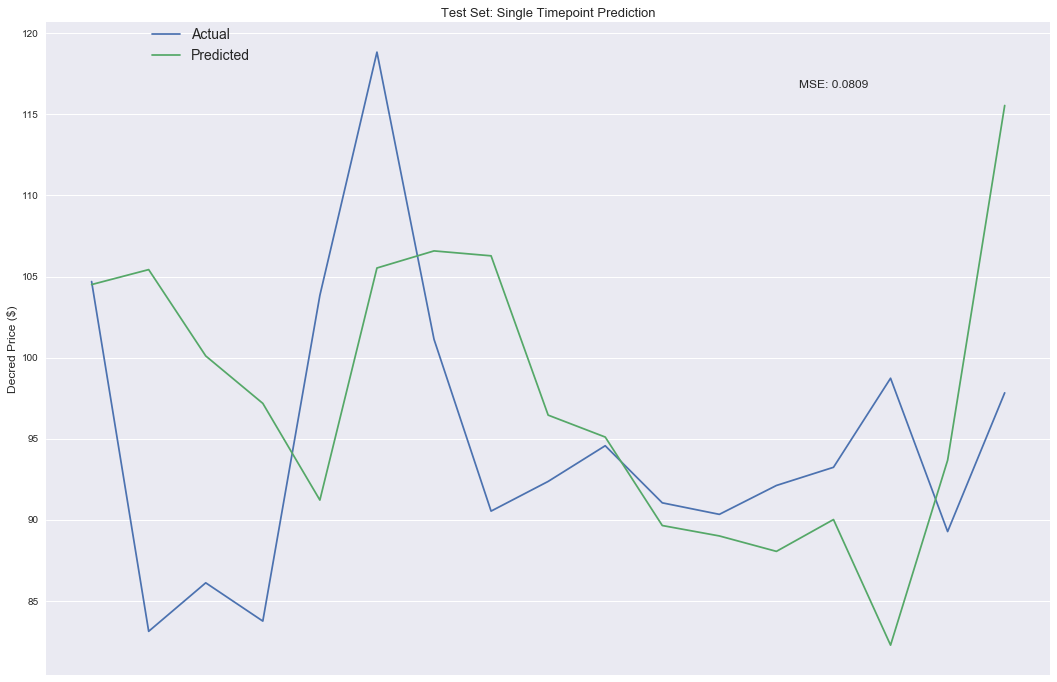

In [60]:
fig, ax1 = plt.subplots(1,1, figsize = (18,12)) 
split_date = '2018-01-05'
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(model2_data[model2_data['Date']>= split_date]['Date'][10:].astype(datetime.datetime),
         test_set['decr_Close'][window_len:], label='Actual')
ax1.plot(model2_data[model2_data['Date']>= split_date]['Date'][10:].astype(datetime.datetime),
         ((np.transpose(decr_model.predict(LSTM_test_inputs))+1) * test_set['decr_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.annotate('MSE: %.4f'%np.mean(np.abs((np.transpose(decr_model.predict(LSTM_test_inputs))+1)-\
            (test_set['decr_Close'].values[window_len:])/(test_set['decr_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Decred Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

TRON MODEL

In [61]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
tron_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)

LSTM_training_outputs = (training_set['tron_Close'][window_len:].values/training_set['tron_Close'][:-window_len].values)-1

# train model on data
tron_history = tron_model.fit(LSTM_training_inputs, LSTM_training_outputs, epochs=50, batch_size=1, verbose=2, shuffle=True)


Epoch 1/50
 - 7s - loss: 6.7352
Epoch 2/50
 - 4s - loss: 5.4451
Epoch 3/50
 - 4s - loss: 4.5729
Epoch 4/50
 - 4s - loss: 3.0781
Epoch 5/50
 - 4s - loss: 1.8672
Epoch 6/50
 - 4s - loss: 1.4852
Epoch 7/50
 - 4s - loss: 1.3043
Epoch 8/50
 - 4s - loss: 0.8547
Epoch 9/50
 - 4s - loss: 0.8436
Epoch 10/50
 - 4s - loss: 0.6868
Epoch 11/50
 - 4s - loss: 0.9160
Epoch 12/50
 - 4s - loss: 0.8008
Epoch 13/50
 - 4s - loss: 0.6229
Epoch 14/50
 - 4s - loss: 0.4432
Epoch 15/50
 - 4s - loss: 0.4245
Epoch 16/50
 - 4s - loss: 0.4790
Epoch 17/50
 - 4s - loss: 0.8489
Epoch 18/50
 - 5s - loss: 0.2865
Epoch 19/50
 - 4s - loss: 0.4888
Epoch 20/50
 - 5s - loss: 0.6531
Epoch 21/50
 - 4s - loss: 0.4040
Epoch 22/50
 - 4s - loss: 0.5737
Epoch 23/50
 - 4s - loss: 0.2894
Epoch 24/50
 - 4s - loss: 0.3601
Epoch 25/50
 - 4s - loss: 0.4109
Epoch 26/50
 - 4s - loss: 0.4206
Epoch 27/50
 - 4s - loss: 0.5041
Epoch 28/50
 - 4s - loss: 0.3302
Epoch 29/50
 - 4s - loss: 0.6276
Epoch 30/50
 - 4s - loss: 0.5458
Epoch 31/50
 - 4s -

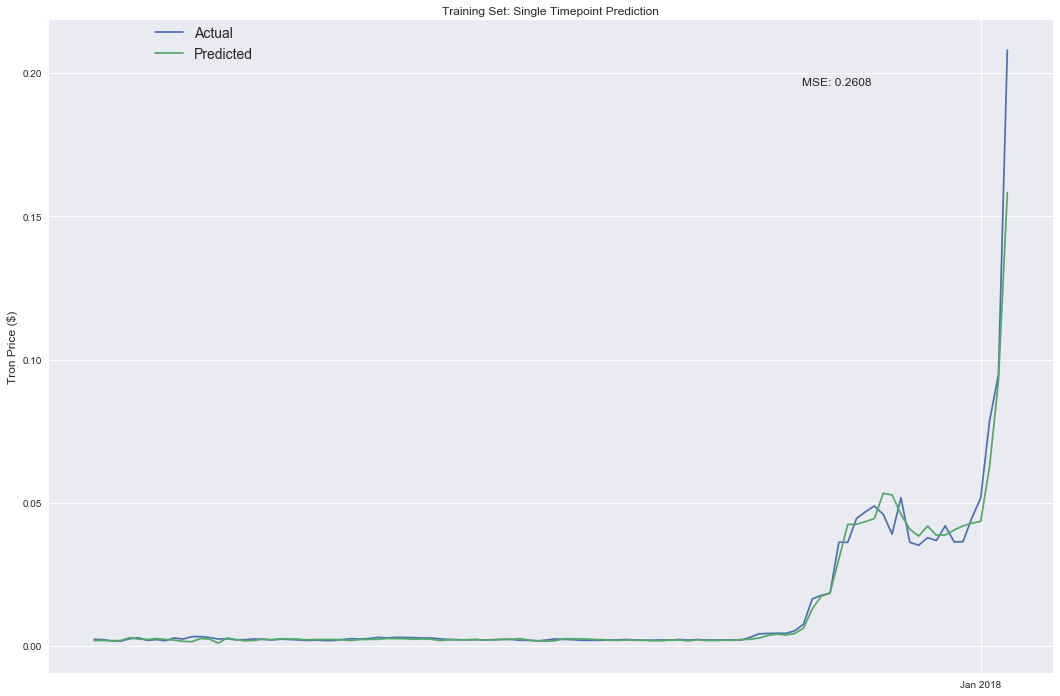

In [62]:
#from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
#from mpl_toolkits.axes_grid1.inset_locator import mark_inset

split_date = '2018-01-05'

fig, ax1 = plt.subplots(1,1, figsize = (18,12))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,5,9]])

ax1.plot(model2_data[model2_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set['tron_Close'][window_len:], label='Actual')

ax1.plot(model2_data[model2_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         ((np.transpose(tron_model.predict(LSTM_training_inputs))+1) * training_set['tron_Close'].values[:-window_len])[0], 
         label='Predicted')

ax1.set_title('Training Set: Single Timepoint Prediction')

ax1.set_ylabel('Tron Price ($)',fontsize=12)
ax1.annotate('MSE: %.4f'%np.mean(np.abs((np.transpose(tron_model.predict(LSTM_training_inputs))+1)-\
            (training_set['tron_Close'].values[window_len:])/(training_set['tron_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')

ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
# figure inset code taken from http://akuederle.com/matplotlib-zoomed-up-inset
#axins = zoomed_inset_axes(ax1, 2.52, loc=10, bbox_to_anchor=(400, 307)) # zoom-factor: 2.52, location: centre
#axins.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
#axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
#         training_set['bt_Close'][window_len:], label='Actual')
#axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
#         ((np.transpose(bt_model.predict(LSTM_training_inputs))+1) * training_set['bt_Close'].values[:-window_len])[0], 
#         label='Predicted')

#axins.set_xlim([datetime.date(2017, 2, 15), datetime.date(2017, 5, 1)])
#axins.set_ylim([920, 1400])
#axins.set_xticklabels('')
#mark_inset(ax1, axins, loc1=1, loc2=3, fc="none", ec="0.5")
plt.show()

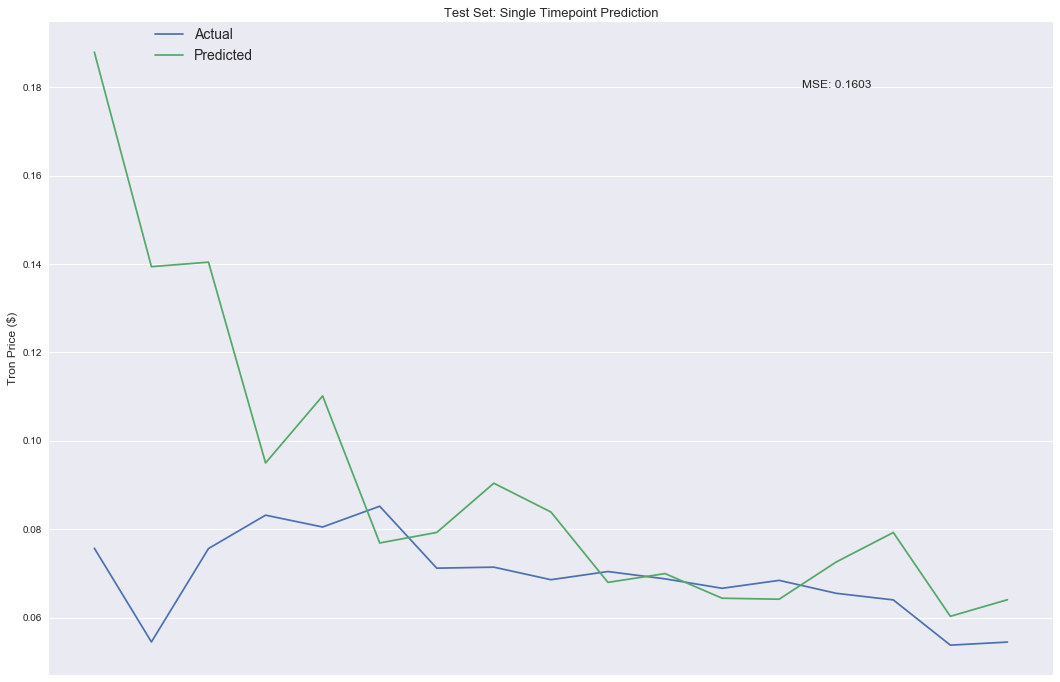

In [63]:
fig, ax1 = plt.subplots(1,1, figsize = (18,12)) 
split_date = '2018-01-05'
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])

ax1.plot(model2_data[model2_data['Date']>= split_date]['Date'][10:].astype(datetime.datetime),
         test_set['tron_Close'][window_len:], label='Actual')

ax1.plot(model2_data[model2_data['Date']>= split_date]['Date'][10:].astype(datetime.datetime),
         ((np.transpose(tron_model.predict(LSTM_test_inputs))+1) * test_set['tron_Close'].values[:-window_len])[0], 
         label='Predicted')

ax1.annotate('MSE: %.4f'%np.mean(np.abs((np.transpose(tron_model.predict(LSTM_test_inputs))+1)-\
            (test_set['tron_Close'].values[window_len:])/(test_set['tron_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Tron Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

CONCLUSION:

We collected daily cryptocurrency data from coinmarketcap.com . 
We applied simple time series lag models and also a complex deep learning model - LSTM model. 

However, the predictions from the LSTM Model were similar to just predicting the next value to be the same as the previous value. With more quantity and granularity of data (hourly data instead of daily data) --> could help the model understand the trends better and potentially lead to a complex model with enhanced predictive power.

Additionally, simpler methods yield decent results, which can lead us to question if this is an area where deep learning provides further information. Time will tell. 
